In [1]:
#%pip install --upgrade numexpr
#%pip install --upgrade bottleneck


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# specify the style of graph we want
plt.style.use('fivethirtyeight')

#### This dataset is from Kaggle called 'Premier League All Players Stats 23/24' 
https://www.kaggle.com/datasets/orkunaktas/premier-league-all-players-stats-2324

In [3]:
players = pd.read_csv('playerdata23-24.csv')
players.head()

Player   Nation    Pos   Age  MP  Starts     Min   90s   Gls  Ast  \
0           Rodri   es ESP     MF  27.0  34      34  2931.0  32.6   8.0  9.0   
1      Phil Foden  eng ENG  FW,MF  23.0  35      33  2857.0  31.7  19.0  8.0   
2         Ederson   br BRA     GK  29.0  33      33  2785.0  30.9   0.0  0.0   
3  Julián Álvarez   ar ARG  MF,FW  23.0  36      31  2647.0  29.4  11.0  8.0   
4     Kyle Walker  eng ENG     DF  33.0  32      30  2767.0  30.7   0.0  4.0   

   ...  Ast_90  G+A_90  G-PK_90  G+A-PK_90  xG_90  xAG_90  xG+xAG_90  npxG_90  \
0  ...    0.28    0.52     0.25       0.52   0.12    0.12       0.24     0.12   
1  ...    0.25    0.85     0.60       0.85   0.33    0.26       0.59     0.33   
2  ...    0.00    0.00     0.00       0.00   0.00    0.00       0.00     0.00   
3  ...    0.27    0.65     0.31       0.58   0.44    0.22       0.66     0.39   
4  ...    0.13    0.13     0.00       0.13   0.01    0.09       0.10     0.01   

   npxG+xAG_90             Team  
0         0.24  Manchester City  
1         0.59  Manchester City  
2         0.00  Manchester City  
3         0.61  Manchester City  
4         0.10  Manchester City  

[5 rows x 34 columns]

In [139]:
players['Pos'].value_counts()

Pos
DF       170
MF       113
FW       95 
FW,MF    59 
MF,FW    49 
GK       40 
DF,MF    22 
MF,DF    18 
DF,FW    9  
FW,DF    5  
Name: count, dtype: int64

In [4]:
players.shape

(580, 34)

In [5]:
players.describe()

Age          MP      Starts          Min         90s  \
count  580.000000  580.000000  580.000000   580.000000  580.000000   
mean    24.906897   19.627586   14.413793  1294.584483   14.383448   
std      4.464593   11.832419   11.926422  1024.720358   11.385342   
min     15.000000    1.000000    0.000000     1.000000    0.000000   
25%     21.000000    9.000000    3.000000   342.750000    3.775000   
50%     25.000000   20.000000   13.000000  1164.000000   12.950000   
75%     28.000000   30.000000   25.000000  2104.250000   23.400000   
max     38.000000   38.000000   38.000000  3420.000000   38.000000   

              Gls         Ast         G+A        G-PK          PK  ...  \
count  580.000000  580.000000  580.000000  580.000000  580.000000  ...   
mean     2.063793    1.481034    3.544828    1.898276    0.165517  ...   
std      3.621238    2.360729    5.391389    3.189739    0.779830  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
50%      1.000000    0.000000    1.000000    1.000000    0.000000  ...   
75%      2.000000    2.000000    4.000000    2.000000    0.000000  ...   
max     27.000000   13.000000   33.000000   20.000000    9.000000  ...   

           Gls_90      Ast_90      G+A_90     G-PK_90   G+A-PK_90       xG_90  \
count  580.000000  580.000000  580.000000  580.000000  580.000000  580.000000   
mean     0.125259    0.091621    0.216810    0.118155    0.209638    0.144983   
std      0.223161    0.160703    0.297085    0.214342    0.287035    0.222225   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.017500   
50%      0.030000    0.000000    0.100000    0.030000    0.100000    0.070000   
75%      0.170000    0.130000    0.310000    0.160000    0.300000    0.190000   
max      2.650000    1.700000    2.650000    2.650000    2.650000    3.230000   

           xAG_90   xG+xAG_90     npxG_90  npxG+xAG_90  
count  580.000000  580.000000  580.000000   580.000000  
mean     0.100707    0.245845    0.138431     0.239466  
std      0.210713    0.348004    0.213947     0.340631  
min      0.000000    0.000000    0.000000     0.000000  
25%      0.010000    0.060000    0.017500     0.060000  
50%      0.060000    0.145000    0.070000     0.145000  
75%      0.140000    0.370000    0.180000     0.350000  
max      4.440000    5.540000    3.230000     5.540000  

[8 rows x 30 columns]

In [6]:
players.columns

Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls_90', 'Ast_90', 'G+A_90',
       'G-PK_90', 'G+A-PK_90', 'xG_90', 'xAG_90', 'xG+xAG_90', 'npxG_90',
       'npxG+xAG_90', 'Team'],
      dtype='object')

In [7]:
#Selected explained column names:
Glossary = pd.DataFrame({'Column Name': ['MP', '90s', 'G+A', 'G-PK', 'PKatt', 'CrdY / CrdR', 'xG', 'npxG', 'xAG', '_90'],
                        'Meaning': ['Matched Played', 'Equivalent amount of full matches played', 'Goals + assists', 'Non penalty goals', 'Penalties attempted', 'Yellow / Red cards', 'Expected Goals', 'Non Penalty expected Goals', 'Expected Assists', 'Per 90 minutes']})
pd.set_option('display.max_colwidth',1)
Glossary

Column Name                                   Meaning
0  MP           Matched Played                          
1  90s          Equivalent amount of full matches played
2  G+A          Goals + assists                         
3  G-PK         Non penalty goals                       
4  PKatt        Penalties attempted                     
5  CrdY / CrdR  Yellow / Red cards                      
6  xG           Expected Goals                          
7  npxG         Non Penalty expected Goals              
8  xAG          Expected Assists                        
9  _90          Per 90 minutes

#### Check for any NaN values  - this is a complete dataset

In [8]:
players.isna().sum()

Player         0
Nation         0
Pos            0
Age            0
MP             0
Starts         0
Min            0
90s            0
Gls            0
Ast            0
G+A            0
G-PK           0
PK             0
PKatt          0
CrdY           0
CrdR           0
xG             0
npxG           0
xAG            0
npxG+xAG       0
PrgC           0
PrgP           0
PrgR           0
Gls_90         0
Ast_90         0
G+A_90         0
G-PK_90        0
G+A-PK_90      0
xG_90          0
xAG_90         0
xG+xAG_90      0
npxG_90        0
npxG+xAG_90    0
Team           0
dtype: int64

## Player Ages

In [9]:
players.sort_values(by='Age', ascending=False)

Player   Nation    Pos   Age  MP  Starts     Min   90s  Gls  \
85   Thiago Silva      br BRA   DF     38.0  31  28      2527.0  28.1  3.0   
319  Ashley Young      eng ENG  DF,MF  38.0  31  27      2280.0  25.3  0.0   
248  Łukasz Fabiański  pl POL   GK     38.0  10  7       721.0   8.0   0.0   
356  James Milner      eng ENG  DF,MF  37.0  15  11      773.0   8.6   0.0   
355  Adam Lallana      eng ENG  MF,FW  35.0  25  13      850.0   9.4   0.0   
..            ...          ...    ...   ...  ..  ..        ...   ...   ...   
228  Omari Kellyman    eng ENG  FW     17.0  2   0       37.0    0.4   0.0   
419  Leon Chiwome      eng ENG  FW     17.0  3   2       174.0   1.9   0.0   
579  Ryan One          sct SCO  FW     17.0  1   0       8.0     0.1   0.0   
79   Ethan Nwaneri     eng ENG  FW     16.0  1   0       14.0    0.2   0.0   
171  Mikey Moore       eng ENG  MF     15.0  2   0       4.0     0.0   0.0   

     Ast  ...  Ast_90  G+A_90  G-PK_90  G+A-PK_90  xG_90  xAG_90  xG+xAG_90  \
85   1.0  ...  0.04    0.14    0.11     0.14       0.03   0.04    0.06        
319  0.0  ...  0.00    0.00    0.00     0.00       0.02   0.06    0.08        
248  0.0  ...  0.00    0.00    0.00     0.00       0.00   0.00    0.00        
356  2.0  ...  0.23    0.23    0.00     0.23       0.03   0.21    0.24        
355  1.0  ...  0.11    0.11    0.00     0.11       0.09   0.18    0.27        
..   ...  ...   ...     ...     ...      ...        ...    ...     ...        
228  0.0  ...  0.00    0.00    0.00     0.00       0.17   0.00    0.17        
419  0.0  ...  0.00    0.00    0.00     0.00       0.05   0.00    0.05        
579  0.0  ...  0.00    0.00    0.00     0.00       0.00   0.00    0.00        
79   0.0  ...  0.00    0.00    0.00     0.00       0.00   0.15    0.15        
171  0.0  ...  0.00    0.00    0.00     0.00       0.00   0.00    0.00        

     npxG_90  npxG+xAG_90               Team  
85   0.03     0.06         Chelsea            
319  0.02     0.08         Everton            
248  0.00     0.00         West Ham United    
356  0.03     0.24         Brighton           
355  0.09     0.27         Brighton           
..    ...      ...              ...           
228  0.17     0.17         Aston Villa        
419  0.05     0.05         Wolverhampton      
579  0.00     0.00         Sheffield United   
79   0.00     0.15         Arsenal            
171  0.00     0.00         Tottenham Hotspur  

[580 rows x 34 columns]

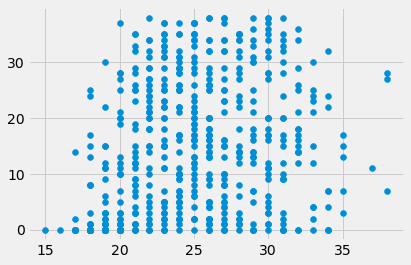

In [10]:
plt.scatter(players['Age'], players['Starts'])

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

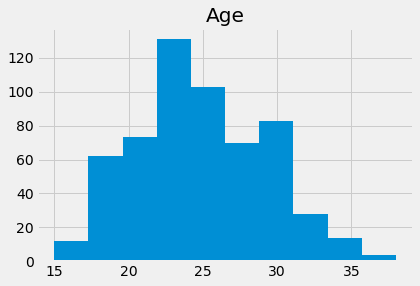

In [11]:
players.hist('Age')

In [12]:
old =  players['Age'] > 30
old

0      False
1      False
2      False
3      False
4      True 
       ...  
575    False
576    False
577    False
578    False
579    False
Name: Age, Length: 580, dtype: bool

In [13]:
old_players = players[old]
old_players

Player   Nation    Pos   Age  MP  Starts     Min   90s   Gls  \
4    Kyle Walker      eng ENG  DF     33.0  32  30      2767.0  30.7  0.0    
13   Kevin De Bruyne  be BEL   MF     32.0  18  15      1221.0  13.6  4.0    
25   Virgil van Dijk  nl NED   DF     32.0  36  36      3177.0  35.3  2.0    
28   Mohamed Salah    eg EGY   FW     31.0  32  28      2534.0  28.2  18.0   
45   Joël Matip       cm CMR   DF     31.0  10  9       781.0   8.7   0.0    
..          ...          ...   ..      ...  .. ..         ...   ...   ...    
542  Jack Cork        eng ENG  MF     34.0  4   0       27.0    0.3   0.0    
550  Wes Foderingham  eng ENG  GK     32.0  30  29      2649.0  29.4  0.0    
554  Oliver Norwood   nir NIR  MF     32.0  27  16      1440.0  16.0  1.0    
571  Chris Basham     eng ENG  DF,MF  35.0  8   3       321.0   3.6   0.0    
574  John Fleck       sct SCO  MF,DF  31.0  4   1       92.0    1.0   0.0    

      Ast  ...  Ast_90  G+A_90  G-PK_90  G+A-PK_90  xG_90  xAG_90  xG+xAG_90  \
4    4.0   ...  0.13    0.13    0.00     0.13       0.01   0.09    0.10        
13   10.0  ...  0.74    1.03    0.29     1.03       0.18   0.85    1.03        
25   2.0   ...  0.06    0.11    0.06     0.11       0.08   0.04    0.12        
28   10.0  ...  0.36    0.99    0.46     0.82       0.75   0.42    1.17        
45   0.0   ...  0.00    0.00    0.00     0.00       0.06   0.01    0.06        
..   ...   ...   ...     ...     ...      ...        ...    ...     ...        
542  0.0   ...  0.00    0.00    0.00     0.00       0.00   0.00    0.00        
550  0.0   ...  0.00    0.00    0.00     0.00       0.00   0.00    0.00        
554  0.0   ...  0.00    0.06    0.00     0.00       0.07   0.04    0.11        
571  0.0   ...  0.00    0.00    0.00     0.00       0.04   0.07    0.10        
574  0.0   ...  0.00    0.00    0.00     0.00       0.00   0.44    0.44        

     npxG_90  npxG+xAG_90              Team  
4    0.01     0.10         Manchester City   
13   0.18     1.03         Manchester City   
25   0.08     0.12         Liverpool         
28   0.55     0.97         Liverpool         
45   0.06     0.06         Liverpool         
..    ...      ...               ...         
542  0.00     0.00         Burnley           
550  0.00     0.00         Sheffield United  
554  0.02     0.06         Sheffield United  
571  0.04     0.10         Sheffield United  
574  0.00     0.44         Sheffield United  

[71 rows x 34 columns]

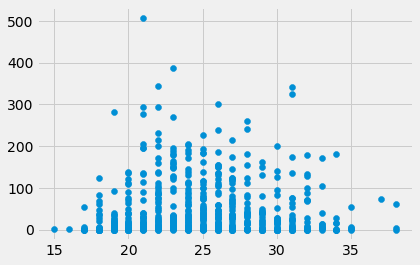

In [14]:
plt.scatter(players['Age'], players['PrgR'])

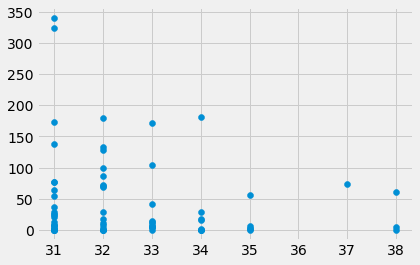

In [15]:
plt.scatter(old_players['Age'], old_players['PrgR'])

### Defenders attacking stats

In [16]:
defender = players['Pos']=='DF'#
players[defender].sort_values('xG+xAG_90', ascending=False)

Player   Nation Pos   Age  MP  Starts     Min   90s  Gls  \
202  Donny van de Beek       nl NED   DF  26.0  1   0       3.0     0.0   0.0   
99   Reece James             eng ENG  DF  23.0  10  5       419.0   4.7   0.0   
97   Ben Chilwell            eng ENG  DF  26.0  13  9       756.0   8.4   0.0   
30   Trent Alexander-Arnold  eng ENG  DF  24.0  28  25      2155.0  23.9  3.0   
34   Andrew Robertson        sct SCO  DF  29.0  23  18      1693.0  18.8  3.0   
..                ...            ...  ..   ...  ..  ..         ...   ...  ...   
285  James Tomkins           eng ENG  DF  34.0  4   0       10.0    0.1   0.0   
76   Jurriën Timber          nl NED   DF  22.0  2   1       71.0    0.8   0.0   
77   Cédric Soares           pt POR   DF  31.0  3   0       62.0    0.7   0.0   
109  Joshua Acheampong       eng ENG  DF  17.0  1   0       6.0     0.1   0.0   
575  Sam Curtis              ie IRL   DF  17.0  1   0       28.0    0.3   0.0   

     Ast  ...  Ast_90  G+A_90  G-PK_90  G+A-PK_90  xG_90  xAG_90  xG+xAG_90  \
202  0.0  ...  0.00    0.00    0.00     0.00       1.09   4.44    5.54        
99   2.0  ...  0.43    0.43    0.00     0.43       0.07   0.37    0.44        
97   1.0  ...  0.12    0.12    0.00     0.12       0.14   0.26    0.41        
30   4.0  ...  0.17    0.29    0.13     0.29       0.11   0.30    0.41        
34   2.0  ...  0.11    0.27    0.16     0.27       0.10   0.29    0.39        
..   ...  ...   ...     ...     ...      ...        ...    ...     ...        
285  0.0  ...  0.00    0.00    0.00     0.00       0.00   0.00    0.00        
76   0.0  ...  0.00    0.00    0.00     0.00       0.00   0.00    0.00        
77   0.0  ...  0.00    0.00    0.00     0.00       0.00   0.00    0.00        
109  0.0  ...  0.00    0.00    0.00     0.00       0.00   0.00    0.00        
575  0.0  ...  0.00    0.00    0.00     0.00       0.00   0.00    0.00        

     npxG_90  npxG+xAG_90               Team  
202  1.09     5.54         Manchester United  
99   0.07     0.44         Chelsea            
97   0.14     0.41         Chelsea            
30   0.10     0.40         Liverpool          
34   0.10     0.39         Liverpool          
..    ...      ...               ...          
285  0.00     0.00         Crystal Palace     
76   0.00     0.00         Arsenal            
77   0.00     0.00         Arsenal            
109  0.00     0.00         Chelsea            
575  0.00     0.00         Sheffield United   

[170 rows x 34 columns]

Players with little minutes playing time has distored values for xG and xAG per 90 minutes. Eg Van de Beek played 3 minutes yet has an xG + xAG per 90 of 5.54. 5 goals more than any other player.

For xG and xAG analysis per 90, I will use only players playing over 500 minutes.

##### To make the analysis more reliable - I will use players only who have played over 500 minutes

In [17]:
regular_players = players.copy()
regular = regular_players['Min'] > 500
regular_players = regular_players[regular]
regular_players.sort_values('Min')

Player   Nation    Pos   Age  MP  Starts     Min   90s  Gls  \
567  Max Lowe           eng ENG  DF,MF  26.0  10  4       503.0   5.6   0.0   
506  Ryan John Giles    eng ENG  DF,MF  23.0  11  5       503.0   5.6   0.0   
162  Giovani Lo Celso   ar ARG   MF     27.0  22  4       506.0   5.6   2.0   
330  André Gomes        pt POR   MF,FW  30.0  12  3       508.0   5.6   1.0   
192  Mason Mount        eng ENG  MF,FW  24.0  14  5       516.0   5.7   1.0   
..           ...            ...    ...   ...  .. ..         ...   ...   ...   
398  Max Kilman         eng ENG  DF     26.0  38  38      3420.0  38.0  2.0   
312  Jordan Pickford    eng ENG  GK     29.0  38  38      3420.0  38.0  0.0   
173  André Onana        cm CMR   GK     27.0  38  38      3420.0  38.0  0.0   
144  Guglielmo Vicario  it ITA   GK     26.0  38  38      3420.0  38.0  0.0   
287  Bernd Leno         de GER   GK     31.0  38  38      3420.0  38.0  0.0   

     Ast  ...  Ast_90  G+A_90  G-PK_90  G+A-PK_90  xG_90  xAG_90  xG+xAG_90  \
567  0.0  ...  0.00    0.00    0.00     0.00       0.10   0.13    0.23        
506  0.0  ...  0.00    0.00    0.00     0.00       0.02   0.04    0.06        
162  2.0  ...  0.36    0.71    0.36     0.71       0.10   0.34    0.45        
330  0.0  ...  0.00    0.18    0.18     0.18       0.05   0.07    0.13        
192  0.0  ...  0.00    0.17    0.17     0.17       0.07   0.06    0.13        
..   ...  ...   ...     ...     ...      ...        ...    ...     ...        
398  0.0  ...  0.00    0.05    0.05     0.05       0.05   0.04    0.08        
312  0.0  ...  0.00    0.00    0.00     0.00       0.00   0.00    0.00        
173  0.0  ...  0.00    0.00    0.00     0.00       0.00   0.00    0.00        
144  0.0  ...  0.00    0.00    0.00     0.00       0.00   0.00    0.00        
287  0.0  ...  0.00    0.00    0.00     0.00       0.00   0.00    0.00        

     npxG_90  npxG+xAG_90               Team  
567  0.10     0.23         Sheffield United   
506  0.02     0.06         Luton Town         
162  0.10     0.45         Tottenham Hotspur  
330  0.05     0.13         Everton            
192  0.07     0.13         Manchester United  
..    ...      ...                       ...  
398  0.05     0.08         Wolverhampton      
312  0.00     0.00         Everton            
173  0.00     0.00         Manchester United  
144  0.00     0.00         Tottenham Hotspur  
287  0.00     0.00         Fulham             

[397 rows x 34 columns]

### Defenders with the most expected goals and assists per 90

In [18]:
defender = regular_players['Pos']=='DF'
regular_players[defender].sort_values('xG+xAG_90', ascending=False).head(10)

Player   Nation Pos   Age  MP  Starts     Min   90s  Gls  \
97   Ben Chilwell            eng ENG  DF  26.0  13  9       756.0   8.4   0.0   
30   Trent Alexander-Arnold  eng ENG  DF  24.0  28  25      2155.0  23.9  3.0   
34   Andrew Robertson        sct SCO  DF  29.0  23  18      1693.0  18.8  3.0   
118  Kieran Trippier         eng ENG  DF  32.0  28  26      2236.0  24.8  1.0   
353  Pervis Estupiñán        ec ECU   DF  25.0  19  15      1243.0  13.8  2.0   
145  Pedro Porro             es ESP   DF  23.0  35  35      3089.0  34.3  3.0   
438  Sergio Reguilón         es ESP   DF  26.0  16  14      1118.0  12.4  0.0   
44   Conor Bradley           nir NIR  DF  20.0  11  10      753.0   8.4   1.0   
91   Malo Gusto              fr FRA   DF  20.0  27  19      1751.0  19.5  0.0   
212  Matty Cash              pl POL   DF  25.0  29  23      2142.0  23.8  2.0   

      Ast  ...  Ast_90  G+A_90  G-PK_90  G+A-PK_90  xG_90  xAG_90  xG+xAG_90  \
97   1.0   ...  0.12    0.12    0.00     0.12       0.14   0.26    0.41        
30   4.0   ...  0.17    0.29    0.13     0.29       0.11   0.30    0.41        
34   2.0   ...  0.11    0.27    0.16     0.27       0.10   0.29    0.39        
118  10.0  ...  0.40    0.44    0.04     0.44       0.03   0.30    0.33        
353  3.0   ...  0.22    0.36    0.14     0.36       0.07   0.25    0.32        
145  7.0   ...  0.20    0.29    0.09     0.29       0.09   0.21    0.30        
438  4.0   ...  0.32    0.32    0.00     0.32       0.06   0.23    0.29        
44   3.0   ...  0.36    0.48    0.12     0.48       0.10   0.17    0.28        
91   6.0   ...  0.31    0.31    0.00     0.31       0.05   0.22    0.27        
212  2.0   ...  0.08    0.17    0.08     0.17       0.18   0.10    0.27        

     npxG_90  npxG+xAG_90               Team  
97   0.14     0.41         Chelsea            
30   0.10     0.40         Liverpool          
34   0.10     0.39         Liverpool          
118  0.03     0.33         Newcastle United   
353  0.07     0.32         Brighton           
145  0.09     0.30         Tottenham Hotspur  
438  0.06     0.29         Brentford          
44   0.10     0.28         Liverpool          
91   0.05     0.27         Chelsea            
212  0.18     0.27         Aston Villa        

[10 rows x 34 columns]

In [19]:
regular_players_GA = regular_players[['Player', 'Pos', 'Min', 'Gls', 'PK', 'Ast', 'G+A', 'xG','xG_90', 'xAG', 'xAG_90', 'xG+xAG_90', 'Team']]
regular_players_GA.head()

#regular_players_GA['xG + xGA'] = regular_players_GA['xG'] + regular_players_GA['xAG']
#regular_players_GA



Player    Pos     Min   Gls   PK  Ast   G+A    xG  xG_90  xAG  \
0  Rodri           MF     2931.0  8.0   0.0  9.0  17.0  4.1   0.12   3.9   
1  Phil Foden      FW,MF  2857.0  19.0  0.0  8.0  27.0  10.3  0.33   8.4   
2  Ederson         GK     2785.0  0.0   0.0  0.0  0.0   0.0   0.00   0.1   
3  Julián Álvarez  MF,FW  2647.0  11.0  2.0  8.0  19.0  13.0  0.44   6.4   
4  Kyle Walker     DF     2767.0  0.0   0.0  4.0  4.0   0.4   0.01   2.6   

   xAG_90  xG+xAG_90             Team  
0  0.12    0.24       Manchester City  
1  0.26    0.59       Manchester City  
2  0.00    0.00       Manchester City  
3  0.22    0.66       Manchester City  
4  0.09    0.10       Manchester City

In [20]:
Bournemouth = regular_players_GA['Team'] == 'Bournemouth'
Bournemouth_players = regular_players_GA[Bournemouth]
Bournemouth_players

Player    Pos     Min   Gls   PK  Ast   G+A    xG  xG_90  xAG  \
368  Illia Zabarnyi    DF     3330.0  1.0   0.0  0.0  1.0   1.1   0.03   0.4   
369  Dominic Solanke   FW     3325.0  19.0  2.0  3.0  22.0  19.6  0.53   3.0   
370  Ryan Christie     MF     2907.0  0.0   0.0  5.0  5.0   2.3   0.07   5.4   
371  Neto              GK     2880.0  0.0   0.0  0.0  0.0   0.0   0.00   0.0   
372  Lewis Cook        MF     2786.0  0.0   0.0  3.0  3.0   0.4   0.01   4.3   
373  Marcos Senesi     DF     2242.0  4.0   0.0  5.0  9.0   2.0   0.08   1.7   
374  Justin Kluivert   MF,FW  1916.0  7.0   0.0  1.0  8.0   6.2   0.29   1.9   
375  Adam Smith        DF     2150.0  0.0   0.0  2.0  2.0   0.1   0.00   1.3   
376  Marcus Tavernier  FW     2118.0  3.0   0.0  4.0  7.0   3.9   0.17   5.2   
377  Antoine Semenyo   FW     2105.0  8.0   0.0  2.0  10.0  4.6   0.20   3.2   
378  Milos Kerkez      DF     1970.0  0.0   0.0  1.0  1.0   1.2   0.06   0.8   
379  Lloyd Kelly       DF     1559.0  0.0   0.0  1.0  1.0   0.3   0.02   1.2   
380  Philip Billing    MF     1398.0  2.0   0.0  2.0  4.0   2.5   0.16   3.2   
381  Max Aarons        DF     1237.0  0.0   0.0  1.0  1.0   0.0   0.00   0.8   
382  Dango Ouattara    FW,DF  1229.0  1.0   0.0  2.0  3.0   2.6   0.19   1.5   
383  Alex Scott        MF     1014.0  1.0   0.0  1.0  2.0   0.7   0.06   1.7   
384  Luis Sinisterra   FW,MF  699.0   2.0   0.0  2.0  4.0   2.5   0.33   2.4   
385  Chris Mepham      DF     617.0   0.0   0.0  1.0  1.0   0.1   0.01   0.4   

     xAG_90  xG+xAG_90         Team  
368  0.01    0.04       Bournemouth  
369  0.08    0.61       Bournemouth  
370  0.17    0.24       Bournemouth  
371  0.00    0.00       Bournemouth  
372  0.14    0.15       Bournemouth  
373  0.07    0.15       Bournemouth  
374  0.09    0.38       Bournemouth  
375  0.05    0.06       Bournemouth  
376  0.22    0.39       Bournemouth  
377  0.14    0.34       Bournemouth  
378  0.04    0.09       Bournemouth  
379  0.07    0.09       Bournemouth  
380  0.21    0.36       Bournemouth  
381  0.06    0.06       Bournemouth  
382  0.11    0.30       Bournemouth  
383  0.15    0.22       Bournemouth  
384  0.31    0.64       Bournemouth  
385  0.06    0.07       Bournemouth

Were there other players Spurs could have got as their new number 9? Solanke scored about as many as he should - didn't overperform

In [21]:
xG = regular_players_GA['xG']
xG

0      4.1 
1      10.3
2      0.0 
3      13.0
4      0.4 
      ...  
562    1.6 
563    0.0 
564    0.6 
565    0.2 
567    0.6 
Name: xG, Length: 397, dtype: float64

In [22]:
xAG = regular_players_GA['xAG']
xAG

0      3.9
1      8.4
2      0.1
3      6.4
4      2.6
      ... 
562    0.1
563    0.0
564    0.4
565    0.3
567    0.7
Name: xAG, Length: 397, dtype: float64

In [23]:
xG_xAG = xG + xAG
xG_xAG

0      8.0 
1      18.7
2      0.1 
3      19.4
4      3.0 
      ...  
562    1.7 
563    0.0 
564    1.0 
565    0.5 
567    1.3 
Length: 397, dtype: float64

In [24]:
regular_players_GA['xG + xAG'] = xG_xAG
regular_players_GA.head()

C:\Users\joshj\AppData\Local\Temp/ipykernel_23612/2834695256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_players_GA['xG + xAG'] = xG_xAG


Player    Pos     Min   Gls   PK  Ast   G+A    xG  xG_90  xAG  \
0  Rodri           MF     2931.0  8.0   0.0  9.0  17.0  4.1   0.12   3.9   
1  Phil Foden      FW,MF  2857.0  19.0  0.0  8.0  27.0  10.3  0.33   8.4   
2  Ederson         GK     2785.0  0.0   0.0  0.0  0.0   0.0   0.00   0.1   
3  Julián Álvarez  MF,FW  2647.0  11.0  2.0  8.0  19.0  13.0  0.44   6.4   
4  Kyle Walker     DF     2767.0  0.0   0.0  4.0  4.0   0.4   0.01   2.6   

   xAG_90  xG+xAG_90             Team  xG + xAG  
0  0.12    0.24       Manchester City  8.0       
1  0.26    0.59       Manchester City  18.7      
2  0.00    0.00       Manchester City  0.1       
3  0.22    0.66       Manchester City  19.4      
4  0.09    0.10       Manchester City  3.0

In [25]:
#make columns for assists minus expected assists, goals minus expected goals G+A - expected G+A
#see who is outperforming there xG the most
# high goals compared to expected goals -> good thing - finishing is good
# high assists compared to expected assists -> not good, lucky the finisher is made you look good 
# high expected assists but low assits -> unlucky finisher is not scoring, maybe player for low team, but would thrive with a better finisher in big team.

regular_players_GA['Gls - XG'] = regular_players_GA['Gls'] - regular_players_GA['xG']
regular_players_GA['Ast - XAG'] = regular_players_GA['Ast'] - regular_players_GA['xAG']
#regular_players_GA['G+A - (XG+ xGA)'] = regular_players_GA['G+A'] - regular_players_GA['xG + xAG']
regular_players_GA.head()

C:\Users\joshj\AppData\Local\Temp/ipykernel_23612/1420947044.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_players_GA['Gls - XG'] = regular_players_GA['Gls'] - regular_players_GA['xG']
C:\Users\joshj\AppData\Local\Temp/ipykernel_23612/1420947044.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_players_GA['Ast - XAG'] = regular_players_GA['Ast'] - regular_players_GA['xAG']


Player    Pos     Min   Gls   PK  Ast   G+A    xG  xG_90  xAG  \
0  Rodri           MF     2931.0  8.0   0.0  9.0  17.0  4.1   0.12   3.9   
1  Phil Foden      FW,MF  2857.0  19.0  0.0  8.0  27.0  10.3  0.33   8.4   
2  Ederson         GK     2785.0  0.0   0.0  0.0  0.0   0.0   0.00   0.1   
3  Julián Álvarez  MF,FW  2647.0  11.0  2.0  8.0  19.0  13.0  0.44   6.4   
4  Kyle Walker     DF     2767.0  0.0   0.0  4.0  4.0   0.4   0.01   2.6   

   xAG_90  xG+xAG_90             Team  xG + xAG  Gls - XG  Ast - XAG  
0  0.12    0.24       Manchester City  8.0       3.9       5.1        
1  0.26    0.59       Manchester City  18.7      8.7      -0.4        
2  0.00    0.00       Manchester City  0.1       0.0      -0.1        
3  0.22    0.66       Manchester City  19.4     -2.0       1.6        
4  0.09    0.10       Manchester City  3.0      -0.4       1.4

In [132]:
good_finishers = regular_players_GA.sort_values('Gls - XG', ascending = False).head(10)
good_assisters = regular_players_GA.sort_values('Ast - XAG', ascending = False).head(10)
good_finishers = good_finishers.reset_index()
del good_finishers['index']
good_finishers

Player    Pos     Min   Gls   PK   Ast   G+A    xG  xG_90  \
0  Phil Foden            FW,MF  2857.0  19.0  0.0  8.0   27.0  10.3  0.33    
1  Callum Hudson-Odoi    FW,MF  1854.0  8.0   0.0  1.0   9.0   2.7   0.13    
2  Jean-Philippe Mateta  FW     2282.0  16.0  2.0  5.0   21.0  10.9  0.43    
3  Son Heung-min         FW     2934.0  17.0  2.0  10.0  27.0  12.0  0.37    
4  Diogo Jota            FW     1145.0  10.0  0.0  3.0   13.0  5.3   0.42    
5  Michael Olise         FW,MF  1275.0  10.0  1.0  6.0   16.0  5.5   0.39    
6  Jarrod Bowen          FW     3019.0  16.0  0.0  6.0   22.0  11.6  0.35    
7  Hwang Hee-chan        FW,MF  2119.0  12.0  1.0  3.0   15.0  7.7   0.33    
8  Elijah Adebayo        FW     1419.0  10.0  0.0  0.0   10.0  5.9   0.37    
9  Leandro Trossard      FW,MF  1649.0  12.0  0.0  1.0   13.0  7.9   0.43    

    xAG  xAG_90  xG+xAG_90               Team  xG + xAG  Gls - XG  Ast - XAG  
0  8.4   0.26    0.59       Manchester City    18.7      8.7      -0.4        
1  2.8   0.14    0.27       Nottingham Forest  5.5       5.3      -1.8        
2  3.1   0.12    0.56       Crystal Palace     14.0      5.1       1.9        
3  11.8  0.36    0.73       Tottenham Hotspur  23.8      5.0      -1.8        
4  3.3   0.26    0.68       Liverpool          8.6       4.7      -0.3        
5  5.8   0.41    0.80       Crystal Palace     11.3      4.5       0.2        
6  5.5   0.16    0.51       West Ham United    17.1      4.4       0.5        
7  3.0   0.13    0.45       Wolverhampton      10.7      4.3       0.0        
8  0.7   0.04    0.42       Luton Town         6.6       4.1      -0.7        
9  2.8   0.15    0.58       Arsenal            10.7      4.1      -1.8

In [27]:
bad_finishers = regular_players_GA.sort_values('Gls - XG', ascending = True).head(10)
bad_assisters = regular_players_GA.sort_values('Ast - XAG', ascending = True).head(10)
bad_finishers

Player    Pos     Min   Gls   PK   Ast   G+A    xG  xG_90  \
320  Dominic Calvert-Lewin  FW     2171.0  7.0   2.0  2.0   9.0   12.9  0.54    
32   Darwin Núñez           FW     2047.0  11.0  0.0  8.0   19.0  16.3  0.72    
154  Brennan Johnson        FW     2085.0  5.0   0.0  10.0  15.0  10.3  0.44    
82   Nicolas Jackson        FW     2799.0  14.0  0.0  5.0   19.0  18.6  0.60    
26   Luis Díaz              FW     2629.0  8.0   0.0  5.0   13.0  11.9  0.41    
326  Beto                   FW     951.0   3.0   0.0  0.0   3.0   6.8   0.64    
436  Keane Lewis-Potter     FW,DF  1441.0  3.0   0.0  1.0   4.0   6.3   0.39    
86   Enzo Fernández         MF     2209.0  3.0   1.0  2.0   5.0   6.2   0.25    
28   Mohamed Salah          FW     2534.0  18.0  5.0  10.0  28.0  21.2  0.75    
345  João Pedro             FW,MF  2045.0  9.0   4.0  3.0   12.0  11.9  0.53    

      xAG  xAG_90  xG+xAG_90               Team  xG + xAG  Gls - XG  Ast - XAG  
320  3.1   0.13    0.66       Everton            16.0     -5.9      -1.1        
32   6.0   0.27    0.98       Liverpool          22.3     -5.3       2.0        
154  8.1   0.35    0.79       Tottenham Hotspur  18.4     -5.3       1.9        
82   4.3   0.14    0.74       Chelsea            22.9     -4.6       0.7        
26   5.7   0.19    0.60       Liverpool          17.6     -3.9      -0.7        
326  0.9   0.09    0.73       Everton            7.7      -3.8      -0.9        
436  1.7   0.11    0.50       Brentford          8.0      -3.3      -0.7        
86   3.4   0.14    0.39       Chelsea            9.6      -3.2      -1.4        
28   11.8  0.42    1.17       Liverpool          33.0     -3.2      -1.8        
345  3.8   0.17    0.69       Brighton           15.7     -2.9      -0.8

In [28]:
bad_assisters

Player    Pos     Min   Gls   PK  Ast   G+A    xG  xG_90  \
148  Dejan Kulusevski        FW,MF  2762.0  8.0   0.0  3.0  11.0  4.7   0.15    
175  Bruno Fernandes         MF,FW  3118.0  10.0  4.0  8.0  18.0  10.0  0.29    
31   Dominik Szoboszlai      MF     2104.0  3.0   0.0  2.0  5.0   3.7   0.16    
34   Andrew Robertson        DF     1693.0  3.0   0.0  2.0  5.0   1.9   0.10    
30   Trent Alexander-Arnold  DF     2155.0  3.0   0.0  4.0  7.0   2.6   0.11    
316  Dwight McNeil           MF,FW  2892.0  3.0   0.0  6.0  9.0   3.4   0.11    
293  Alex Iwobi              FW,MF  2192.0  5.0   0.0  2.0  7.0   5.3   0.22    
323  Amadou Onana            MF     2091.0  2.0   0.0  0.0  2.0   2.0   0.09    
341  Simon Adingra           FW     2222.0  6.0   0.0  1.0  7.0   4.3   0.17    
315  James Garner            MF     3004.0  1.0   0.0  2.0  3.0   2.7   0.08    

      xAG  xAG_90  xG+xAG_90               Team  xG + xAG  Gls - XG  Ast - XAG  
148  7.7   0.25    0.40       Tottenham Hotspur  12.4      3.3      -4.7        
175  11.8  0.34    0.63       Manchester United  21.8      0.0      -3.8        
31   5.8   0.25    0.40       Liverpool          9.5      -0.7      -3.8        
34   5.4   0.29    0.39       Liverpool          7.3       1.1      -3.4        
30   7.2   0.30    0.41       Liverpool          9.8       0.4      -3.2        
316  8.8   0.27    0.38       Everton            12.2     -0.4      -2.8        
293  4.7   0.19    0.41       Fulham             10.0     -0.3      -2.7        
323  2.7   0.11    0.20       Everton            4.7       0.0      -2.7        
341  3.7   0.15    0.32       Brighton           8.0       1.7      -2.7        
315  4.6   0.14    0.22       Everton            7.3      -1.7      -2.6

### Top finishers score more goals than predicted from their xG - i.e. they score chances other players would not

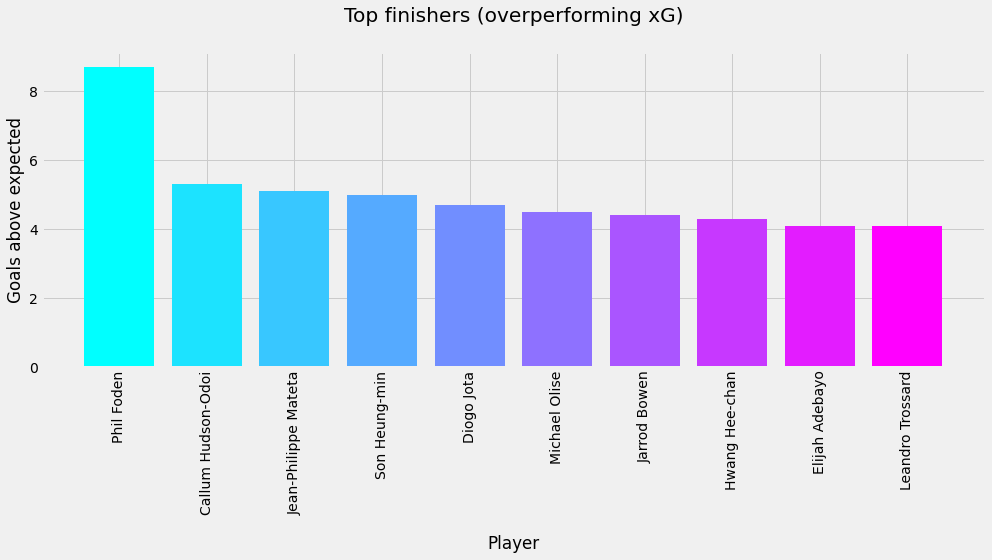

In [29]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 1, figsize=(14, 8))

# Create a color map (adjust np.linspace to match the number of bars)
colors = plt.cm.cool(np.linspace(0, 1, len(good_finishers['Player'])))

# Plot data for good finishers on the first subplot (axes[0])
axes.bar(good_finishers['Player'], good_finishers['Gls - XG'], color=colors)
axes.set_title('Top finishers (overperforming xG)', pad=30)
axes.tick_params(axis='x', rotation=90)
axes.set_xlabel('Player', labelpad=20)
axes.set_ylabel('Goals above expected')


plt.tight_layout()

plt.show()

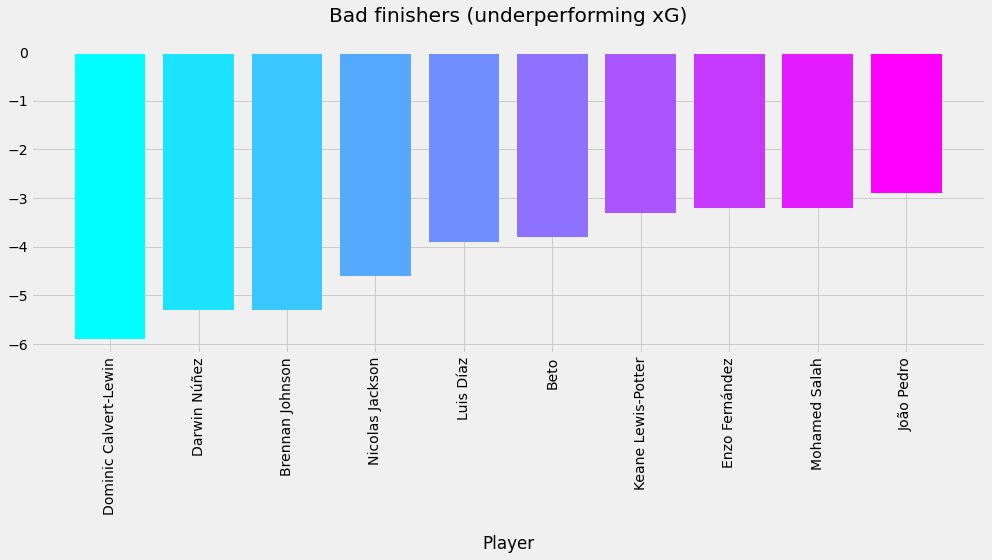

In [30]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 1, figsize=(14, 8))

# Create a color map (adjust np.linspace to match the number of bars)
colors = plt.cm.cool(np.linspace(0, 1, len(good_finishers['Player'])))



axes.bar(bad_finishers['Player'], bad_finishers['Gls - XG'], color=colors)
axes.set_title('Bad finishers (underperforming xG)', pad=30)
axes.tick_params(axis='x', rotation=90)
axes.set_xlabel('Player', labelpad=20)

# Adjust layout to make room for rotated labels
plt.tight_layout()

plt.show()


In [31]:
good_assisters

Player    Pos     Min   Gls   PK   Ast   G+A    xG  xG_90  xAG  \
204  Ollie Watkins    FW     3217.0  19.0  0.0  13.0  32.0  16.8  0.47   7.3   
0    Rodri            MF     2931.0  8.0   0.0  9.0   17.0  4.1   0.12   3.9   
409  Pedro Neto       FW,MF  1516.0  2.0   0.0  9.0   11.0  3.5   0.21   4.4   
404  Matheus Cunha    FW,MF  2440.0  12.0  1.0  7.0   19.0  9.5   0.35   3.2   
11   Jeremy Doku      FW,MF  1595.0  3.0   0.0  8.0   11.0  2.5   0.14   4.6   
216  Youri Tielemans  MF,FW  1622.0  2.0   0.0  6.0   8.0   1.3   0.07   2.6   
373  Marcos Senesi    DF     2242.0  4.0   0.0  5.0   9.0   2.0   0.08   1.7   
152  James Maddison   MF     2135.0  4.0   0.0  9.0   13.0  6.4   0.27   5.9   
235  Vladimír Coufal  DF     3132.0  0.0   0.0  7.0   7.0   0.3   0.01   4.0   
263  Jordan Ayew      FW,MF  2543.0  4.0   0.0  7.0   11.0  3.9   0.14   4.2   

     xAG_90  xG+xAG_90               Team  xG + xAG  Gls - XG  Ast - XAG  
204  0.21    0.68       Aston Villa        24.1      2.2       5.7        
0    0.12    0.24       Manchester City    8.0       3.9       5.1        
409  0.26    0.47       Wolverhampton      7.9      -1.5       4.6        
404  0.12    0.47       Wolverhampton      12.7      2.5       3.8        
11   0.26    0.40       Manchester City    7.1       0.5       3.4        
216  0.14    0.21       Aston Villa        3.9       0.7       3.4        
373  0.07    0.15       Bournemouth        3.7       2.0       3.3        
152  0.25    0.52       Tottenham Hotspur  12.3     -2.4       3.1        
235  0.11    0.12       West Ham United    4.3      -0.3       3.0        
263  0.15    0.29       Crystal Palace     8.1       0.1       2.8

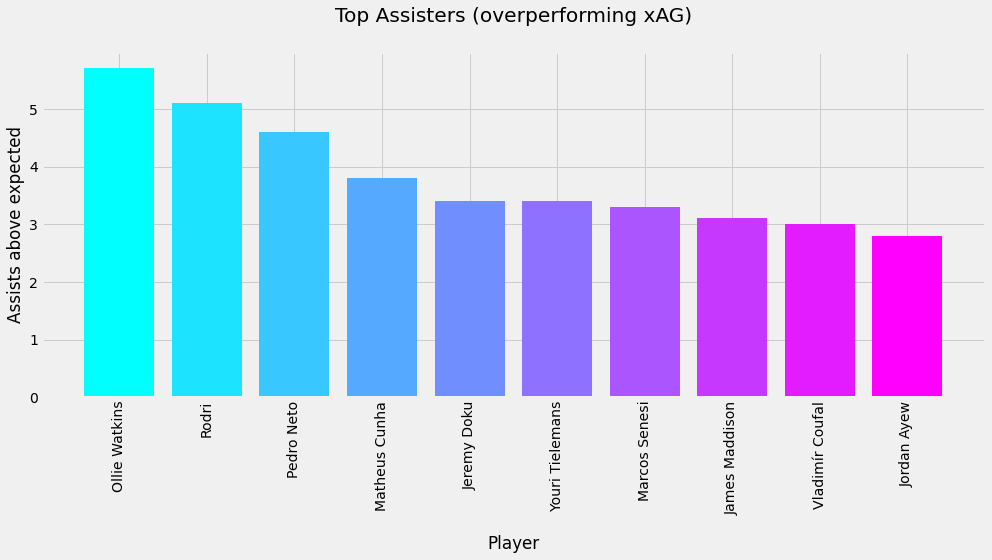

In [32]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 1, figsize=(14, 8))

# Create a color map (adjust np.linspace to match the number of bars)
colors = plt.cm.cool(np.linspace(0, 1, len(good_assisters['Player'])))

# Plot data for good finishers on the first subplot (axes[0])
axes.bar(good_assisters['Player'], good_assisters['Ast - XAG'], color=colors)
axes.set_title('Top Assisters (overperforming xAG)', pad=30)
axes.tick_params(axis='x', rotation=90)
axes.set_xlabel('Player', labelpad=20)
axes.set_ylabel('Assists above expected')

# Adjust layout to make room for rotated labels
plt.tight_layout()

plt.show()


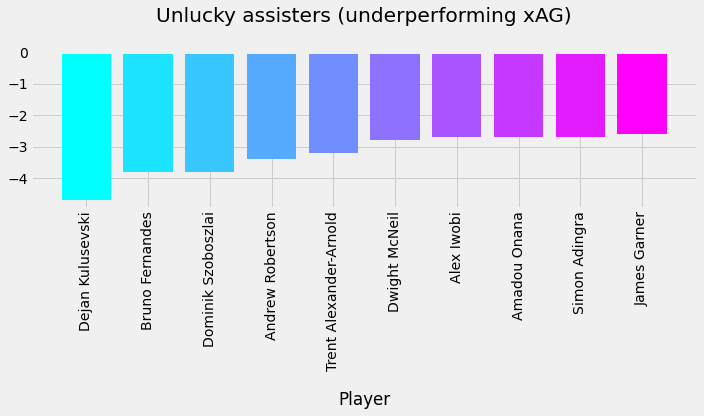

In [33]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Create a color map (adjust np.linspace to match the number of bars)
colors = plt.cm.cool(np.linspace(0, 1, len(good_assisters['Player'])))


# Plot data for bad finishers on the second subplot (axes[1])
axes.bar(bad_assisters['Player'], bad_assisters['Ast - XAG'], color=colors)
axes.set_title('Unlucky assisters (underperforming xAG)', pad=30)
axes.tick_params(axis='x', rotation=90)
axes.set_xlabel('Player', labelpad=20)

# Adjust layout to make room for rotated labels
plt.tight_layout()

plt.show()


### Underperforming on assist xAG is unlucky because this is down to bad finishing from the striker
### In a better team with a more clinical striker, these players may thrive

### Overperforming xAG - these players assists statistics look better than they should be due to good finishing from their strikers

# Progressiveness

In [34]:
progressive = players.copy()
progressive = progressive[['Player', 'Pos','Age', 'Min', 'PrgC', 'PrgP', 'PrgR', 'Team']]
progressive.head()

Player    Pos   Age     Min  PrgC   PrgP   PrgR             Team
0  Rodri           MF     27.0  2931.0  76.0  376.0  55.0   Manchester City
1  Phil Foden      FW,MF  23.0  2857.0  93.0  168.0  269.0  Manchester City
2  Ederson         GK     29.0  2785.0  0.0   4.0    0.0    Manchester City
3  Julián Álvarez  MF,FW  23.0  2647.0  64.0  103.0  180.0  Manchester City
4  Kyle Walker     DF     33.0  2767.0  74.0  157.0  172.0  Manchester City

In [35]:
progressive['Progressiveness'] = progressive['PrgC'] + progressive['PrgP'] + progressive['PrgR']
progressive['Progressiveness per 90'] = (progressive['Progressiveness'] / progressive['Min']) * 90
progressive.head()

Player    Pos   Age     Min  PrgC   PrgP   PrgR             Team  \
0  Rodri           MF     27.0  2931.0  76.0  376.0  55.0   Manchester City   
1  Phil Foden      FW,MF  23.0  2857.0  93.0  168.0  269.0  Manchester City   
2  Ederson         GK     29.0  2785.0  0.0   4.0    0.0    Manchester City   
3  Julián Álvarez  MF,FW  23.0  2647.0  64.0  103.0  180.0  Manchester City   
4  Kyle Walker     DF     33.0  2767.0  74.0  157.0  172.0  Manchester City   

   Progressiveness  Progressiveness per 90  
0  507.0            15.568066               
1  530.0            16.695835               
2  4.0              0.129264                
3  347.0            11.798262               
4  403.0            13.108059

see rice compared to population, rice v other top 6 midfielders

In [36]:
progressive_mid = (progressive['Pos'] == 'MF') & (progressive['Min'] > 300)
progressive_mid_only = progressive[progressive_mid] 
progressive_mid_only.head()

Player Pos   Age     Min  PrgC   PrgP   PrgR  \
0   Rodri                MF  27.0  2931.0  76.0  376.0  55.0    
12  Mateo Kovačić        MF  29.0  1551.0  37.0  100.0  38.0    
13  Kevin De Bruyne      MF  32.0  1221.0  47.0  111.0  133.0   
17  Matheus Nunes        MF  24.0  661.0   28.0  34.0   58.0    
27  Alexis Mac Allister  MF  24.0  2599.0  44.0  209.0  48.0    

               Team  Progressiveness  Progressiveness per 90  
0   Manchester City  507.0            15.568066               
12  Manchester City  175.0            10.154739               
13  Manchester City  291.0            21.449631               
17  Manchester City  120.0            16.338880               
27  Liverpool        301.0            10.423240

In [138]:
progressive_mid_only

Player Pos   Age     Min  PrgC   PrgP   PrgR  \
0    Rodri                MF  27.0  2931.0  76.0  376.0  55.0    
12   Mateo Kovačić        MF  29.0  1551.0  37.0  100.0  38.0    
13   Kevin De Bruyne      MF  32.0  1221.0  47.0  111.0  133.0   
17   Matheus Nunes        MF  24.0  661.0   28.0  34.0   58.0    
27   Alexis Mac Allister  MF  24.0  2599.0  44.0  209.0  48.0    
..                   ...  ..   ...     ...   ...    ...   ...    
545  Gustavo Hamer        MF  26.0  2910.0  36.0  135.0  86.0    
548  Vinicius Souza       MF  24.0  2668.0  7.0   66.0   21.0    
554  Oliver Norwood       MF  32.0  1440.0  3.0   73.0   10.0    
560  Oliver Arblaster     MF  19.0  943.0   13.0  43.0   4.0     
568  Anis Ben Slimane     MF  22.0  419.0   3.0   12.0   21.0    

                 Team  Progressiveness  Progressiveness per 90  
0    Manchester City   507.0            15.568066               
12   Manchester City   175.0            10.154739               
13   Manchester City   291.0            21.449631               
17   Manchester City   120.0            16.338880               
27   Liverpool         301.0            10.423240               
..         ...           ...                  ...               
545  Sheffield United  257.0            7.948454                
548  Sheffield United  94.0             3.170915                
554  Sheffield United  86.0             5.375000                
560  Sheffield United  60.0             5.726405                
568  Sheffield United  36.0             7.732697                

[81 rows x 10 columns]

In [37]:
progressive_mid_only.loc[progressive_mid_only['Player'] == 'Rodri', 'Progressiveness per 90']

0    15.568066
Name: Progressiveness per 90, dtype: float64

In [38]:
len(progressive_mid_only)

81

In [39]:
Rice = progressive_mid_only['Player'] == 'Declan Rice'
progressive_mid_only[Rice]

Player Pos   Age     Min  PrgC   PrgP  PrgR     Team  \
56  Declan Rice  MF  24.0  3225.0  75.0  278.0  64.0  Arsenal   

    Progressiveness  Progressiveness per 90  
56  417.0            11.637209

In [40]:
progressive_mid_only.loc[56]['Progressiveness per 90']

11.637209302325582

## Top Progressive Midfielders per 90

In [41]:
top_progressive_mid = progressive_mid_only.sort_values('Progressiveness per 90', ascending = False).head(12)
top_progressive_mid

Player Pos   Age     Min  PrgC   PrgP   PrgR  \
162  Giovani Lo Celso    MF  27.0  506.0   25.0  68.0   29.0    
13   Kevin De Bruyne     MF  32.0  1221.0  47.0  111.0  133.0   
57   Martin Ødegaard     MF  24.0  3091.0  91.0  344.0  202.0   
152  James Maddison      MF  26.0  2135.0  58.0  224.0  156.0   
31   Dominik Szoboszlai  MF  22.0  2104.0  75.0  152.0  160.0   
17   Matheus Nunes       MF  24.0  661.0   28.0  34.0   58.0    
0    Rodri               MF  27.0  2931.0  76.0  376.0  55.0    
303  Tom Cairney         MF  32.0  1488.0  35.0  145.0  72.0    
41   Ryan Gravenberch    MF  21.0  1121.0  39.0  78.0   71.0    
38   Curtis Jones        MF  22.0  1167.0  31.0  74.0   88.0    
73   Emile Smith Rowe    MF  23.0  353.0   11.0  23.0   18.0    
86   Enzo Fernández      MF  22.0  2209.0  52.0  210.0  54.0    

                  Team  Progressiveness  Progressiveness per 90  
162  Tottenham Hotspur  122.0            21.699605               
13   Manchester City    291.0            21.449631               
57   Arsenal            637.0            18.547396               
152  Tottenham Hotspur  438.0            18.463700               
31   Liverpool          387.0            16.554183               
17   Manchester City    120.0            16.338880               
0    Manchester City    507.0            15.568066               
303  Fulham             252.0            15.241935               
41   Liverpool          188.0            15.093666               
38   Liverpool          193.0            14.884319               
73   Arsenal            52.0             13.257790               
86   Chelsea            316.0            12.874604

In [42]:
worse_progressive_mid = progressive_mid_only.sort_values('Progressiveness per 90', ascending = True).head(12)
worse_progressive_mid

Player Pos   Age     Min  PrgC  PrgP  PrgR  \
548  Vinicius Souza        MF  24.0  2668.0  7.0   66.0  21.0   
502  Marvelous Nakamba     MF  29.0  1130.0  1.0   36.0  5.0    
290  João Palhinha         MF  28.0  2699.0  8.0   97.0  14.0   
239  Tomáš Souček          MF  28.0  2870.0  7.0   86.0  39.0   
461  Orel Mangala          MF  25.0  1563.0  13.0  45.0  14.0   
361  Mahmoud Dahoud        MF  27.0  452.0   4.0   11.0  6.0    
401  Mario Lemina          MF  29.0  2968.0  32.0  76.0  49.0   
504  Pelly Ruddock Mpanzu  MF  30.0  1101.0  10.0  34.0  15.0   
469  Ibrahim Sangaré       MF  25.0  1035.0  5.0   44.0  7.0    
270  Will Hughes           MF  28.0  1891.0  14.0  76.0  17.0   
243  Edson Álvarez         MF  25.0  2377.0  20.0  91.0  26.0   
352  Carlos Baleba         MF  19.0  1325.0  19.0  50.0  9.0    

                  Team  Progressiveness  Progressiveness per 90  
548  Sheffield United   94.0             3.170915                
502  Luton Town         42.0             3.345133                
290  Fulham             119.0            3.968136                
239  West Ham United    132.0            4.139373                
461  Nottingham Forest  72.0             4.145873                
361  Brighton           21.0             4.181416                
401  Wolverhampton      157.0            4.760782                
504  Luton Town         59.0             4.822888                
469  Nottingham Forest  56.0             4.869565                
270  Crystal Palace     107.0            5.092544                
243  West Ham United    137.0            5.187211                
352  Brighton           78.0             5.298113

In [134]:
Rodri = 'Rodri'
Rice = 'Declan Rice'
def Progressiveness(player):
   # player = input("Enter the player's name: ")
    players = pd.read_csv('playerdata23-24.csv')
    progressive = players.copy()
    progressive = progressive[['Player', 'Pos', 'Min', 'PrgC', 'PrgP', 'PrgR']]
    progressive['Progressiveness'] = progressive['PrgC'] + progressive['PrgP'] + progressive['PrgR']
    progressive['Progressiveness per 90'] = (progressive['PrgC'] + progressive['PrgP'] + progressive['PrgR']) / progressive['Min']
    progressive_mid = (progressive['Pos'] == 'MF') & (progressive['Min'] > 300)
    progressive_mid_only = progressive[progressive_mid] 
    
    
    fig,ax = plt.subplots(1,1)
    ax = progressive_mid_only['Progressiveness per 90'].plot(kind='hist', fontsize=14, color='#00ABC8', bins=20)
    plt.xlabel('Progressiveness per 90', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    player_progressiveness = progressive_mid_only.loc[progressive_mid_only['Player'] == player, 'Progressiveness per 90']
    if player_progressiveness.empty:
        print("Please enter a player's full name in quotes e.g. 'Declan Rice'")
        return  # Exit the function if the player is not found
    
    plt.plot(player_progressiveness, 2 , 'o', markersize = 10,color = 'red', label = f'{player} Progressiveness' )
    plt.title(f' {player} Progressiveness (Midfielders only)'  ,y=1.05, fontsize=14)
    ax.legend(loc='upper right', fontsize=12)
    return

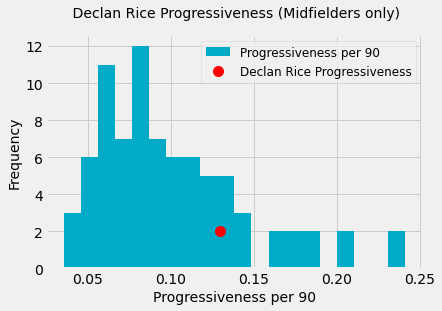

In [135]:
Progressiveness('Declan Rice')

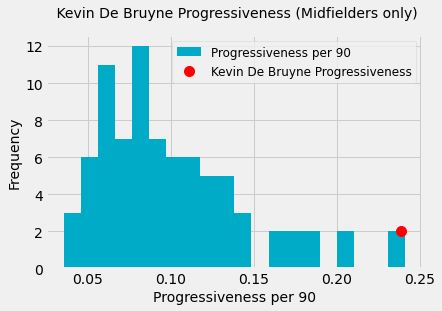

In [45]:
Progressiveness('Kevin De Bruyne')

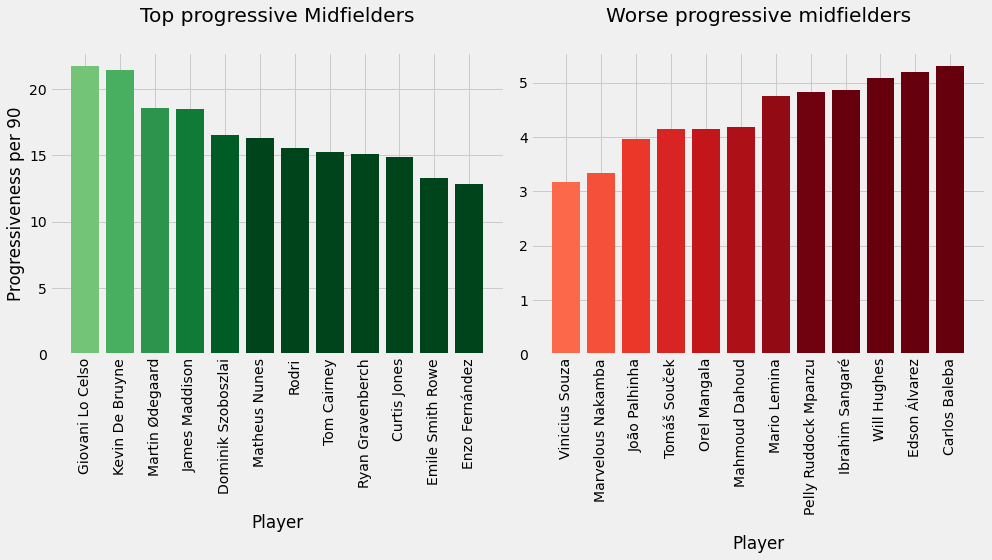

In [46]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# Create a color map (adjust np.linspace to match the number of bars)
colors = plt.cm.Greens(np.linspace(0.5, 9, len(progressive_mid_only['Player'])))
colors2 = plt.cm.Reds(np.linspace(0.5, 6, len(progressive_mid_only['Player'])))

# Plot data for good finishers on the first subplot (axes[0])
axes[0].bar(top_progressive_mid['Player'], top_progressive_mid['Progressiveness per 90'], color=colors)
axes[0].set_title('Top progressive Midfielders', pad=30)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_xlabel('Player', labelpad=20)
axes[0].set_ylabel('Progressiveness per 90')

# Plot data for bad finishers on the second subplot (axes[1])
axes[1].bar(worse_progressive_mid['Player'], worse_progressive_mid['Progressiveness per 90'], color=colors2)
axes[1].set_title('Worse progressive midfielders', pad=30)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_xlabel('Player', labelpad=20)

# Adjust layout to make room for rotated labels
plt.tight_layout()

plt.show()


### Outside Top 6

In [47]:
outsideTop6_Progmid = progressive_mid_only[~progressive_mid_only['Team'].isin(['Arsenal', 'Manchester City', 'Chelsea', 'Liverpool', 'Tottenham Hotspur', 'Manchester United'])]
top_outsideTop6_Progmid = outsideTop6_Progmid.sort_values('Progressiveness per 90', ascending=False).head(12)
top_outsideTop6_Progmid


Player Pos   Age     Min  PrgC   PrgP   PrgR              Team  \
303  Tom Cairney       MF  32.0  1488.0  35.0  145.0  72.0   Fulham             
134  Joe Willock       MF  23.0  419.0   16.0  17.0   26.0   Newcastle United   
443  Mikkel Damsgaard  MF  23.0  842.0   16.0  61.0   32.0   Brentford          
112  Bruno Guimarães   MF  25.0  3263.0  65.0  283.0  73.0   Newcastle United   
342  Billy Gilmour     MF  22.0  2120.0  39.0  193.0  33.0   Brighton           
445  Yehor Yarmoliuk   MF  19.0  688.0   13.0  35.0   36.0   Brentford          
289  Andreas Pereira   MF  27.0  2613.0  56.0  138.0  125.0  Fulham             
133  Sandro Tonali     MF  23.0  438.0   11.0  19.0   21.0   Newcastle United   
383  Alex Scott        MF  19.0  1014.0  24.0  50.0   35.0   Bournemouth        
370  Ryan Christie     MF  28.0  2907.0  60.0  167.0  78.0   Bournemouth        
116  Sean Longstaff    MF  25.0  2747.0  24.0  145.0  116.0  Newcastle United   
124  Lewis Miley       MF  17.0  1202.0  14.0  53.0   54.0   Newcastle United   

     Progressiveness  Progressiveness per 90  
303  252.0            15.241935               
134  59.0             12.673031               
443  109.0            11.650831               
112  421.0            11.612013               
342  265.0            11.250000               
445  84.0             10.988372               
289  319.0            10.987371               
133  51.0             10.479452               
383  109.0            9.674556                
370  305.0            9.442724                
116  285.0            9.337459                
124  121.0            9.059900

In [48]:
top6_progmid = progressive_mid_only[progressive_mid_only['Team'].isin(['Arsenal', 'Manchester City', 'Chelsea', 'Liverpool', 'Tottenham Hotspur', 'Manchester United'])]
worse_top6_progmid = top6_progmid.sort_values('Progressiveness per 90', ascending=True).head(12)
worse_top6_progmid

Player Pos   Age     Min  PrgC   PrgP   PrgR  \
180  Kobbie Mainoo        MF  18.0  1924.0  25.0  64.0   36.0    
33   Wataru Endo          MF  30.0  1722.0  10.0  101.0  21.0    
81   Moisés Caicedo       MF  21.0  2866.0  27.0  173.0  27.0    
100  Lesley Ugochukwu     MF  19.0  301.0   8.0   17.0   3.0     
188  Christian Eriksen    MF  31.0  1141.0  20.0  68.0   23.0    
153  Yves Bissouma        MF  26.0  2068.0  43.0  169.0  13.0    
12   Mateo Kovačić        MF  29.0  1551.0  37.0  100.0  38.0    
80   Conor Gallagher      MF  23.0  3128.0  62.0  172.0  122.0   
27   Alexis Mac Allister  MF  24.0  2599.0  44.0  209.0  48.0    
156  Rodrigo Bentancur    MF  26.0  1005.0  16.0  72.0   31.0    
70   Jorginho             MF  31.0  921.0   8.0   101.0  8.0     
56   Declan Rice          MF  24.0  3225.0  75.0  278.0  64.0    

                  Team  Progressiveness  Progressiveness per 90  
180  Manchester United  125.0            5.847193                
33   Liverpool          132.0            6.898955                
81   Chelsea            227.0            7.128402                
100  Chelsea            28.0             8.372093                
188  Manchester United  111.0            8.755478                
153  Tottenham Hotspur  225.0            9.792070                
12   Manchester City    175.0            10.154739               
80   Chelsea            356.0            10.242967               
27   Liverpool          301.0            10.423240               
156  Tottenham Hotspur  119.0            10.656716               
70   Arsenal            117.0            11.433225               
56   Arsenal            417.0            11.637209

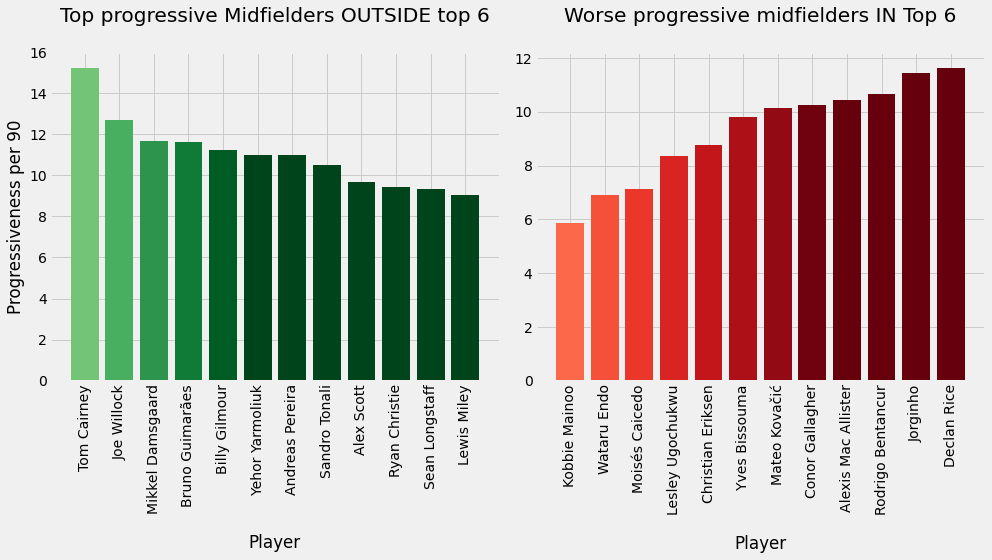

In [49]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# Create a color map (adjust np.linspace to match the number of bars)
colors = plt.cm.Greens(np.linspace(0.5, 9, len(progressive_mid_only['Player'])))
colors2 = plt.cm.Reds(np.linspace(0.5, 6, len(progressive_mid_only['Player'])))

# Plot data for good finishers on the first subplot (axes[0])
axes[0].bar(top_outsideTop6_Progmid['Player'], top_outsideTop6_Progmid['Progressiveness per 90'], color=colors)
axes[0].set_title('Top progressive Midfielders OUTSIDE top 6', pad=30)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_xlabel('Player', labelpad=20)
axes[0].set_ylabel('Progressiveness per 90')

# Plot data for bad finishers on the second subplot (axes[1])
axes[1].bar(worse_top6_progmid['Player'], worse_top6_progmid['Progressiveness per 90'], color=colors2)
axes[1].set_title('Worse progressive midfielders IN Top 6', pad=30)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_xlabel('Player', labelpad=20)

# Adjust layout to make room for rotated labels
plt.tight_layout()

plt.show()


#### Perhaps Surprisingly, Mainoo is the least progressive midfielder from the traditional top 6

#### Top finishers outside top 6
#### Unlucky assisters outside top 6

In [50]:
good_finishers

Player    Pos     Min   Gls   PK   Ast   G+A    xG  xG_90  \
1    Phil Foden            FW,MF  2857.0  19.0  0.0  8.0   27.0  10.3  0.33    
457  Callum Hudson-Odoi    FW,MF  1854.0  8.0   0.0  1.0   9.0   2.7   0.13    
265  Jean-Philippe Mateta  FW     2282.0  16.0  2.0  5.0   21.0  10.9  0.43    
146  Son Heung-min         FW     2934.0  17.0  2.0  10.0  27.0  12.0  0.37    
39   Diogo Jota            FW     1145.0  10.0  0.0  3.0   13.0  5.3   0.42    
278  Michael Olise         FW,MF  1275.0  10.0  1.0  6.0   16.0  5.5   0.39    
237  Jarrod Bowen          FW     3019.0  16.0  0.0  6.0   22.0  11.6  0.35    
407  Hwang Hee-chan        FW,MF  2119.0  12.0  1.0  3.0   15.0  7.7   0.33    
497  Elijah Adebayo        FW     1419.0  10.0  0.0  0.0   10.0  5.9   0.37    
65   Leandro Trossard      FW,MF  1649.0  12.0  0.0  1.0   13.0  7.9   0.43    

      xAG  xAG_90  xG+xAG_90               Team  xG + xAG  Gls - XG  Ast - XAG  
1    8.4   0.26    0.59       Manchester City    18.7      8.7      -0.4        
457  2.8   0.14    0.27       Nottingham Forest  5.5       5.3      -1.8        
265  3.1   0.12    0.56       Crystal Palace     14.0      5.1       1.9        
146  11.8  0.36    0.73       Tottenham Hotspur  23.8      5.0      -1.8        
39   3.3   0.26    0.68       Liverpool          8.6       4.7      -0.3        
278  5.8   0.41    0.80       Crystal Palace     11.3      4.5       0.2        
237  5.5   0.16    0.51       West Ham United    17.1      4.4       0.5        
407  3.0   0.13    0.45       Wolverhampton      10.7      4.3       0.0        
497  0.7   0.04    0.42       Luton Town         6.6       4.1      -0.7        
65   2.8   0.15    0.58       Arsenal            10.7      4.1      -1.8

In [51]:
sort_by_finishing = regular_players_GA.sort_values('Gls - XG', ascending = False)
best_outisde_top6_finishers = sort_by_finishing[~sort_by_finishing['Team'].isin(['Arsenal', 'Manchester City', 'Chelsea', 'Liverpool', 'Tottenham Hotspur', 'Manchester United'])].head(10)
best_outisde_top6_finishers = best_outisde_top6_finishers[best_outisde_top6_finishers['Pos'].isin(['FW', 'MF,FW', 'FW,MF'])]
best_outisde_top6_finishers

Player    Pos     Min   Gls   PK  Ast   G+A    xG  xG_90  \
457  Callum Hudson-Odoi    FW,MF  1854.0  8.0   0.0  1.0  9.0   2.7   0.13    
265  Jean-Philippe Mateta  FW     2282.0  16.0  2.0  5.0  21.0  10.9  0.43    
278  Michael Olise         FW,MF  1275.0  10.0  1.0  6.0  16.0  5.5   0.39    
237  Jarrod Bowen          FW     3019.0  16.0  0.0  6.0  22.0  11.6  0.35    
407  Hwang Hee-chan        FW,MF  2119.0  12.0  1.0  3.0  15.0  7.7   0.33    
497  Elijah Adebayo        FW     1419.0  10.0  0.0  0.0  10.0  5.9   0.37    
213  Leon Bailey           MF,FW  2068.0  10.0  0.0  9.0  19.0  6.3   0.27    
377  Antoine Semenyo       FW     2105.0  8.0   0.0  2.0  10.0  4.6   0.20    
244  Mohammed Kudus        FW,MF  2484.0  8.0   0.0  6.0  14.0  5.1   0.19    

     xAG  xAG_90  xG+xAG_90               Team  xG + xAG  Gls - XG  Ast - XAG  
457  2.8  0.14    0.27       Nottingham Forest  5.5       5.3      -1.8        
265  3.1  0.12    0.56       Crystal Palace     14.0      5.1       1.9        
278  5.8  0.41    0.80       Crystal Palace     11.3      4.5       0.2        
237  5.5  0.16    0.51       West Ham United    17.1      4.4       0.5        
407  3.0  0.13    0.45       Wolverhampton      10.7      4.3       0.0        
497  0.7  0.04    0.42       Luton Town         6.6       4.1      -0.7        
213  9.2  0.40    0.67       Aston Villa        15.5      3.7      -0.2        
377  3.2  0.14    0.34       Bournemouth        7.8       3.4      -1.2        
244  3.5  0.13    0.31       West Ham United    8.6       2.9       2.5

Text(0, 0.5, 'Goals above expected (xG)')

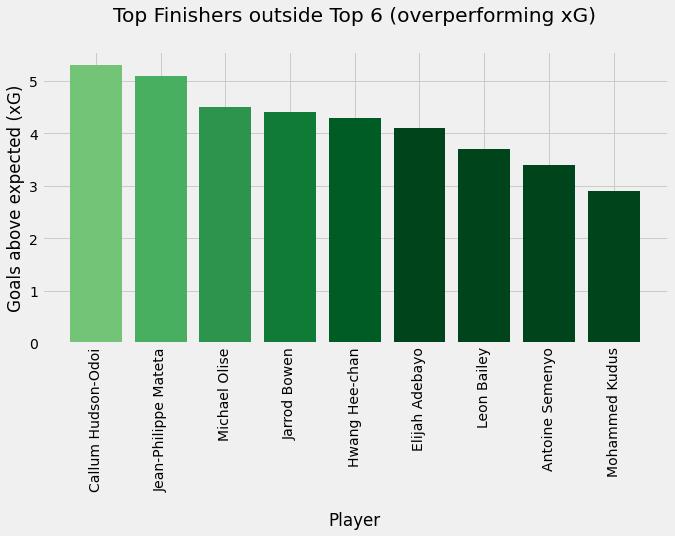

In [52]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Create a color map (adjust np.linspace to match the number of bars)
colors = plt.cm.Greens(np.linspace(0.5, 9, len(progressive_mid_only['Player'])))
colors2 = plt.cm.Reds(np.linspace(0.5, 6, len(progressive_mid_only['Player'])))

# Plot data for good finishers on the first subplot (axes[0])
axes.bar(best_outisde_top6_finishers['Player'], best_outisde_top6_finishers['Gls - XG'], color=colors)
axes.set_title('Top Finishers outside Top 6 (overperforming xG)', pad=30)
axes.tick_params(axis='x', rotation=90)
axes.set_xlabel('Player', labelpad=20)
axes.set_ylabel('Goals above expected (xG)')

#### If these players got a move to a bigger team and got more chances per game - they may take their game to the next level due to their good finishing

In [53]:
sort_by_assists = regular_players_GA.sort_values('Ast - XAG', ascending = True)
sort_by_assists.head()
unlucky_assist_outside_top6 = sort_by_assists[~sort_by_assists['Team'].isin(['Arsenal', 'Manchester City', 'Chelsea', 'Liverpool', 'Tottenham Hotspur', 'Manchester United'])].head(12)
unlucky_assist_outside_top6

Player    Pos     Min  Gls   PK  Ast  G+A   xG  xG_90  xAG  \
316  Dwight McNeil       MF,FW  2892.0  3.0  0.0  6.0  9.0  3.4  0.11   8.8   
293  Alex Iwobi          FW,MF  2192.0  5.0  0.0  2.0  7.0  5.3  0.22   4.7   
323  Amadou Onana        MF     2091.0  2.0  0.0  0.0  2.0  2.0  0.09   2.7   
341  Simon Adingra       FW     2222.0  6.0  0.0  1.0  7.0  4.3  0.17   3.7   
315  James Garner        MF     3004.0  1.0  0.0  2.0  3.0  2.7  0.08   4.6   
494  Chiedozie Ogbene    MF,DF  1995.0  4.0  0.0  1.0  5.0  4.2  0.19   3.1   
317  Abdoulaye Doucouré  FW,MF  2629.0  7.0  0.0  1.0  8.0  8.8  0.30   2.9   
294  Willian             FW     2053.0  4.0  2.0  2.0  6.0  5.1  0.22   3.9   
426  Vitaly Janelt       MF,DF  3054.0  1.0  0.0  3.0  4.0  1.8  0.05   4.8   
552  Cameron Archer      FW,MF  1832.0  4.0  0.0  1.0  5.0  5.5  0.27   2.8   
457  Callum Hudson-Odoi  FW,MF  1854.0  8.0  0.0  1.0  9.0  2.7  0.13   2.8   
123  Joelinton           MF,FW  1279.0  2.0  0.0  1.0  3.0  3.1  0.22   2.8   

     xAG_90  xG+xAG_90               Team  xG + xAG  Gls - XG  Ast - XAG  
316  0.27    0.38       Everton            12.2     -0.4      -2.8        
293  0.19    0.41       Fulham             10.0     -0.3      -2.7        
323  0.11    0.20       Everton            4.7       0.0      -2.7        
341  0.15    0.32       Brighton           8.0       1.7      -2.7        
315  0.14    0.22       Everton            7.3      -1.7      -2.6        
494  0.14    0.33       Luton Town         7.3      -0.2      -2.1        
317  0.10    0.40       Everton            11.7     -1.8      -1.9        
294  0.17    0.40       Fulham             9.0      -1.1      -1.9        
426  0.14    0.19       Brentford          6.6      -0.8      -1.8        
552  0.14    0.41       Sheffield United   8.3      -1.5      -1.8        
457  0.14    0.27       Nottingham Forest  5.5       5.3      -1.8        
123  0.20    0.41       Newcastle United   5.9      -1.1      -1.8

Text(0, 0.5, 'Assists Below expected (xAG)')

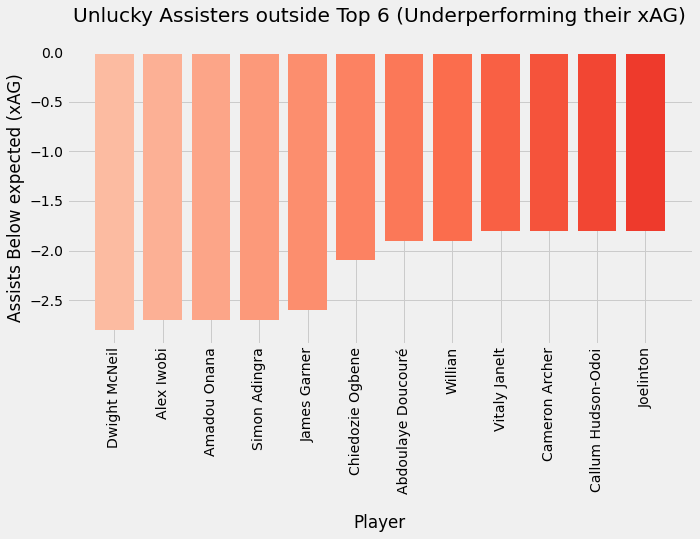

In [54]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Create a color map (adjust np.linspace to match the number of bars)
colors = plt.cm.Greens(np.linspace(0.5, 9, len(progressive_mid_only['Player'])))
colors2 = plt.cm.Reds(np.linspace(0.25, 3, len(progressive_mid_only['Player'])))

# Plot data for good finishers on the first subplot (axes[0])
axes.bar(unlucky_assist_outside_top6['Player'], unlucky_assist_outside_top6['Ast - XAG'], color=colors2)
axes.set_title('Unlucky Assisters outside Top 6 (Underperforming their xAG)', pad=30)
axes.tick_params(axis='x', rotation=90)
axes.set_xlabel('Player', labelpad=20)
axes.set_ylabel('Assists Below expected (xAG)')

### If these players got a move to a bigger club with top finishers - their assists may go up.

In [55]:
regular_players.head()

Player   Nation    Pos   Age  MP  Starts     Min   90s   Gls  Ast  \
0  Rodri           es ESP   MF     27.0  34  34      2931.0  32.6  8.0   9.0   
1  Phil Foden      eng ENG  FW,MF  23.0  35  33      2857.0  31.7  19.0  8.0   
2  Ederson         br BRA   GK     29.0  33  33      2785.0  30.9  0.0   0.0   
3  Julián Álvarez  ar ARG   MF,FW  23.0  36  31      2647.0  29.4  11.0  8.0   
4  Kyle Walker     eng ENG  DF     33.0  32  30      2767.0  30.7  0.0   4.0   

   ...  Ast_90  G+A_90  G-PK_90  G+A-PK_90  xG_90  xAG_90  xG+xAG_90  npxG_90  \
0  ...  0.28    0.52    0.25     0.52       0.12   0.12    0.24       0.12      
1  ...  0.25    0.85    0.60     0.85       0.33   0.26    0.59       0.33      
2  ...  0.00    0.00    0.00     0.00       0.00   0.00    0.00       0.00      
3  ...  0.27    0.65    0.31     0.58       0.44   0.22    0.66       0.39      
4  ...  0.13    0.13    0.00     0.13       0.01   0.09    0.10       0.01      

   npxG+xAG_90             Team  
0  0.24         Manchester City  
1  0.59         Manchester City  
2  0.00         Manchester City  
3  0.61         Manchester City  
4  0.10         Manchester City  

[5 rows x 34 columns]

In [56]:
most_yellows = regular_players[['Player','Pos', 'Team', 'CrdY', 'CrdR']].sort_values('CrdY', ascending=False).head(12)
most_yellows
most_reds = regular_players[['Player','Pos', 'Team', 'CrdY', 'CrdR']].sort_values('CrdR', ascending=False).head(12)
most_reds


Player    Pos               Team  CrdY  CrdR
153  Yves Bissouma      MF     Tottenham Hotspur  10.0  2.0 
555  Oliver McBurnie    FW     Sheffield United   7.0   2.0 
0    Rodri              MF     Manchester City    8.0   1.0 
514  Sander Berge       MF     Burnley            10.0  1.0 
91   Malo Gusto         DF     Chelsea            7.0   1.0 
372  Lewis Cook         MF     Bournemouth        5.0   1.0 
245  Nayef Aguerd       DF     West Ham United    3.0   1.0 
174  Diogo Dalot        DF     Manchester United  6.0   1.0 
68   Takehiro Tomiyasu  DF     Arsenal            2.0   1.0 
515  Dara O'Shea        DF     Burnley            5.0   1.0 
378  Milos Kerkez       DF     Bournemouth        4.0   1.0 
263  Jordan Ayew        FW,MF  Crystal Palace     9.0   1.0

Text(0, 0.5, 'Yellows')

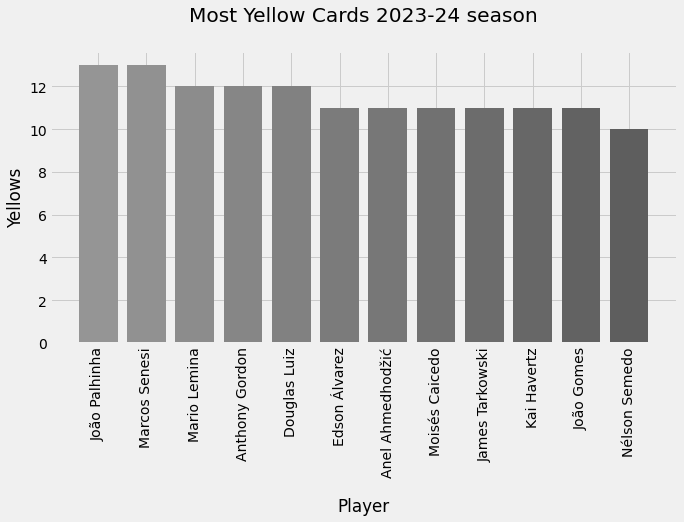

In [57]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Create a color map (adjust np.linspace to match the number of bars)
colors = plt.cm.Greens(np.linspace(0.5, 9, len(progressive_mid_only['Player'])))
colors2 = plt.cm.Greys(np.linspace(0.5, 2, len(progressive_mid_only['Player'])))

# Plot data for good finishers on the first subplot (axes[0])
axes.bar(most_yellows['Player'], most_yellows['CrdY'], color=colors2)
axes.set_title('Most Yellow Cards 2023-24 season', pad=30)
axes.tick_params(axis='x', rotation=90)
axes.set_xlabel('Player', labelpad=20)
axes.set_ylabel('Yellows')

In [58]:
progressive.head()

Player    Pos   Age     Min  PrgC   PrgP   PrgR             Team  \
0  Rodri           MF     27.0  2931.0  76.0  376.0  55.0   Manchester City   
1  Phil Foden      FW,MF  23.0  2857.0  93.0  168.0  269.0  Manchester City   
2  Ederson         GK     29.0  2785.0  0.0   4.0    0.0    Manchester City   
3  Julián Álvarez  MF,FW  23.0  2647.0  64.0  103.0  180.0  Manchester City   
4  Kyle Walker     DF     33.0  2767.0  74.0  157.0  172.0  Manchester City   

   Progressiveness  Progressiveness per 90  
0  507.0            15.568066               
1  530.0            16.695835               
2  4.0              0.129264                
3  347.0            11.798262               
4  403.0            13.108059

In [59]:
progressive_def = (progressive['Pos'] == 'DF') & (progressive['Min'] > 500)
progressive_def_only = progressive[progressive_def]
progressive_def_only


Player Pos   Age     Min  PrgC   PrgP   PrgR              Team  \
4    Kyle Walker      DF  33.0  2767.0  74.0  157.0  172.0  Manchester City    
7    Rúben Dias       DF  26.0  2559.0  34.0  173.0  16.0   Manchester City    
9    Joško Gvardiol   DF  21.0  2328.0  63.0  136.0  115.0  Manchester City    
10   Nathan Aké       DF  28.0  2042.0  24.0  116.0  18.0   Manchester City    
25   Virgil van Dijk  DF  32.0  3177.0  32.0  200.0  7.0    Liverpool          
..               ...  ..   ...     ...   ...    ...  ...          ...          
551  Auston Trusty    DF  24.0  2572.0  10.0  40.0   15.0   Sheffield United   
559  George Baldock   DF  30.0  969.0   9.0   31.0   24.0   Sheffield United   
561  Luke Thomas      DF  22.0  917.0   8.0   33.0   22.0   Sheffield United   
564  Mason Holgate    DF  26.0  710.0   0.0   13.0   0.0    Sheffield United   
565  Yasser Larouci   DF  22.0  531.0   18.0  14.0   12.0   Sheffield United   

     Progressiveness  Progressiveness per 90  
4    403.0            13.108059               
7    223.0            7.842907                
9    314.0            12.139175               
10   158.0            6.963761                
25   239.0            6.770538                
..     ...                 ...                
551  65.0             2.274495                
559  64.0             5.944272                
561  63.0             6.183206                
564  13.0             1.647887                
565  44.0             7.457627                

[138 rows x 10 columns]

### Top Progressive Defenders

In [60]:
Top_progressive_def = progressive_def_only.sort_values('Progressiveness per 90', ascending=False)
Top_progressive_def.head(12)

Player Pos   Age     Min  PrgC   PrgP   PrgR  \
34   Andrew Robertson        DF  29.0  1693.0  63.0  140.0  130.0   
64   Oleksandr Zinchenko     DF  26.0  1722.0  40.0  229.0  58.0    
46   Kostas Tsimikas         DF  27.0  679.0   24.0  31.0   73.0    
353  Pervis Estupiñán        DF  25.0  1243.0  47.0  83.0   88.0    
91   Malo Gusto              DF  20.0  1751.0  78.0  86.0   135.0   
44   Conor Bradley           DF  20.0  753.0   35.0  29.0   64.0    
30   Trent Alexander-Arnold  DF  24.0  2155.0  45.0  205.0  97.0    
149  Destiny Udogie          DF  20.0  2391.0  83.0  155.0  138.0   
4    Kyle Walker             DF  33.0  2767.0  74.0  157.0  172.0   
118  Kieran Trippier         DF  32.0  2236.0  34.0  157.0  128.0   
97   Ben Chilwell            DF  26.0  756.0   22.0  25.0   59.0    
35   Joe Gomez               DF  26.0  1786.0  44.0  100.0  105.0   

                  Team  Progressiveness  Progressiveness per 90  
34   Liverpool          333.0            17.702304               
64   Arsenal            327.0            17.090592               
46   Liverpool          128.0            16.966127               
353  Brighton           218.0            15.784393               
91   Chelsea            299.0            15.368361               
44   Liverpool          128.0            15.298805               
30   Liverpool          347.0            14.491879               
149  Tottenham Hotspur  376.0            14.153074               
4    Manchester City    403.0            13.108059               
118  Newcastle United   319.0            12.839893               
97   Chelsea            106.0            12.619048               
35   Liverpool          249.0            12.547592

### Top progressive defenders outside top 6

In [61]:
Top_progressive_Defenders_outsideTop6 = Top_progressive_def[~Top_progressive_def['Team'].isin(['Arsenal', 'Manchester City', 'Chelsea', 'Liverpool', 'Tottenham Hotspur', 'Manchester United'])]
Top_progressive_Defenders_outsideTop6.head(15)


Player Pos   Age     Min  PrgC   PrgP   PrgR  \
353  Pervis Estupiñán      DF  25.0  1243.0  47.0  83.0   88.0    
118  Kieran Trippier       DF  32.0  2236.0  34.0  157.0  128.0   
127  Valentino Livramento  DF  20.0  1314.0  44.0  61.0   76.0    
218  Álex Moreno           DF  30.0  1031.0  32.0  24.0   83.0    
210  Lucas Digne           DF  30.0  2410.0  42.0  77.0   200.0   
288  Antonee Robinson      DF  25.0  3265.0  99.0  129.0  194.0   
305  Kenny Tete            DF  27.0  867.0   20.0  54.0   38.0    
487  Alfie Doughty         DF  23.0  2925.0  94.0  106.0  164.0   
444  Saman Ghoddos         DF  29.0  739.0   22.0  36.0   31.0    
131  Lewis Hall            DF  18.0  781.0   19.0  46.0   27.0    
212  Matty Cash            DF  25.0  2142.0  62.0  88.0   101.0   
492  Issa Kaboré           DF  22.0  1729.0  60.0  54.0   85.0    
463  Neco Williams         DF  22.0  1637.0  48.0  47.0   86.0    
526  Lorenz Assignon       DF  23.0  1234.0  38.0  34.0   57.0    
347  Joël Veltman          DF  31.0  1588.0  24.0  85.0   54.0    

                  Team  Progressiveness  Progressiveness per 90  
353  Brighton           218.0            15.784393               
118  Newcastle United   319.0            12.839893               
127  Newcastle United   181.0            12.397260               
218  Aston Villa        139.0            12.133851               
210  Aston Villa        319.0            11.912863               
288  Fulham             422.0            11.632466               
305  Fulham             112.0            11.626298               
487  Luton Town         364.0            11.200000               
444  Brentford          89.0             10.838972               
131  Newcastle United   92.0             10.601793               
212  Aston Villa        251.0            10.546218               
492  Luton Town         199.0            10.358589               
463  Nottingham Forest  181.0            9.951130                
526  Burnley            129.0            9.408428                
347  Brighton           163.0            9.238035

In [62]:
progressive_def_only.head()

Player Pos   Age     Min  PrgC   PrgP   PrgR             Team  \
4   Kyle Walker      DF  33.0  2767.0  74.0  157.0  172.0  Manchester City   
7   Rúben Dias       DF  26.0  2559.0  34.0  173.0  16.0   Manchester City   
9   Joško Gvardiol   DF  21.0  2328.0  63.0  136.0  115.0  Manchester City   
10  Nathan Aké       DF  28.0  2042.0  24.0  116.0  18.0   Manchester City   
25  Virgil van Dijk  DF  32.0  3177.0  32.0  200.0  7.0    Liverpool         

    Progressiveness  Progressiveness per 90  
4   403.0            13.108059               
7   223.0            7.842907                
9   314.0            12.139175               
10  158.0            6.963761                
25  239.0            6.770538

### Young progressive defenders

In [63]:
Top_prog_def = progressive_def_only.sort_values('Progressiveness per 90', ascending=False)
Top_young_prog_def = Top_prog_def['Age'] < 24
Top_young_progressive_defender = Top_prog_def[Top_young_prog_def]
Top_young_progressive_defender.head(15)

Player Pos   Age     Min  PrgC   PrgP   PrgR  \
91   Malo Gusto            DF  20.0  1751.0  78.0  86.0   135.0   
44   Conor Bradley         DF  20.0  753.0   35.0  29.0   64.0    
149  Destiny Udogie        DF  20.0  2391.0  83.0  155.0  138.0   
127  Valentino Livramento  DF  20.0  1314.0  44.0  61.0   76.0    
9    Joško Gvardiol        DF  21.0  2328.0  63.0  136.0  115.0   
145  Pedro Porro           DF  23.0  3089.0  57.0  194.0  158.0   
487  Alfie Doughty         DF  23.0  2925.0  94.0  106.0  164.0   
131  Lewis Hall            DF  18.0  781.0   19.0  46.0   27.0    
492  Issa Kaboré           DF  22.0  1729.0  60.0  54.0   85.0    
463  Neco Williams         DF  22.0  1637.0  48.0  47.0   86.0    
526  Lorenz Assignon       DF  23.0  1234.0  38.0  34.0   57.0    
325  Nathan Patterson      DF  21.0  1005.0  17.0  38.0   39.0    
378  Milos Kerkez          DF  19.0  1970.0  46.0  44.0   93.0    
358  Jack Hinshelwood      DF  18.0  869.0   16.0  19.0   38.0    
565  Yasser Larouci        DF  22.0  531.0   18.0  14.0   12.0    

                  Team  Progressiveness  Progressiveness per 90  
91   Chelsea            299.0            15.368361               
44   Liverpool          128.0            15.298805               
149  Tottenham Hotspur  376.0            14.153074               
127  Newcastle United   181.0            12.397260               
9    Manchester City    314.0            12.139175               
145  Tottenham Hotspur  409.0            11.916478               
487  Luton Town         364.0            11.200000               
131  Newcastle United   92.0             10.601793               
492  Luton Town         199.0            10.358589               
463  Nottingham Forest  181.0            9.951130                
526  Burnley            129.0            9.408428                
325  Everton            94.0             8.417910                
378  Bournemouth        183.0            8.360406                
358  Brighton           73.0             7.560414                
565  Sheffield United   44.0             7.457627

In [64]:
Top_young_progressive_defender_outsideTop6 = Top_young_progressive_defender[~Top_young_progressive_defender['Team'].isin(['Arsenal', 'Manchester City', 'Chelsea', 'Liverpool', 'Tottenham Hotspur', 'Manchester United'])]
Top_young_progressive_defender_outsideTop6.head(15)

Player Pos   Age     Min  PrgC   PrgP   PrgR  \
127  Valentino Livramento  DF  20.0  1314.0  44.0  61.0   76.0    
487  Alfie Doughty         DF  23.0  2925.0  94.0  106.0  164.0   
131  Lewis Hall            DF  18.0  781.0   19.0  46.0   27.0    
492  Issa Kaboré           DF  22.0  1729.0  60.0  54.0   85.0    
463  Neco Williams         DF  22.0  1637.0  48.0  47.0   86.0    
526  Lorenz Assignon       DF  23.0  1234.0  38.0  34.0   57.0    
325  Nathan Patterson      DF  21.0  1005.0  17.0  38.0   39.0    
378  Milos Kerkez          DF  19.0  1970.0  46.0  44.0   93.0    
358  Jack Hinshelwood      DF  18.0  869.0   16.0  19.0   38.0    
565  Yasser Larouci        DF  22.0  531.0   18.0  14.0   12.0    
340  Jan Paul van Hecke    DF  23.0  2369.0  25.0  147.0  7.0     
381  Max Aarons            DF  23.0  1237.0  22.0  43.0   26.0    
561  Luke Thomas           DF  22.0  917.0   8.0   33.0   22.0    
546  Jayden Bogle          DF  23.0  2788.0  38.0  60.0   92.0    
442  Aaron Hickey          DF  21.0  713.0   9.0   21.0   13.0    

                  Team  Progressiveness  Progressiveness per 90  
127  Newcastle United   181.0            12.397260               
487  Luton Town         364.0            11.200000               
131  Newcastle United   92.0             10.601793               
492  Luton Town         199.0            10.358589               
463  Nottingham Forest  181.0            9.951130                
526  Burnley            129.0            9.408428                
325  Everton            94.0             8.417910                
378  Bournemouth        183.0            8.360406                
358  Brighton           73.0             7.560414                
565  Sheffield United   44.0             7.457627                
340  Brighton           179.0            6.800338                
381  Bournemouth        91.0             6.620857                
561  Sheffield United   63.0             6.183206                
546  Sheffield United   190.0            6.133429                
442  Brentford          43.0             5.427770

In [65]:
progressive_mid_only.head()

Player Pos   Age     Min  PrgC   PrgP   PrgR  \
0   Rodri                MF  27.0  2931.0  76.0  376.0  55.0    
12  Mateo Kovačić        MF  29.0  1551.0  37.0  100.0  38.0    
13  Kevin De Bruyne      MF  32.0  1221.0  47.0  111.0  133.0   
17  Matheus Nunes        MF  24.0  661.0   28.0  34.0   58.0    
27  Alexis Mac Allister  MF  24.0  2599.0  44.0  209.0  48.0    

               Team  Progressiveness  Progressiveness per 90  
0   Manchester City  507.0            15.568066               
12  Manchester City  175.0            10.154739               
13  Manchester City  291.0            21.449631               
17  Manchester City  120.0            16.338880               
27  Liverpool        301.0            10.423240

### Top young progressive Midfielders

In [127]:
Top_prog_mid = progressive_mid_only.sort_values('Progressiveness per 90', ascending=False)
Top_young_prog_mid = Top_prog_mid['Age'] < 24
Top_young_progressive_midfield = Top_prog_mid[Top_young_prog_mid]
Top_young_progressive_midfield.head(12)

Player Pos   Age     Min  PrgC   PrgP   PrgR  \
31   Dominik Szoboszlai  MF  22.0  2104.0  75.0  152.0  160.0   
41   Ryan Gravenberch    MF  21.0  1121.0  39.0  78.0   71.0    
38   Curtis Jones        MF  22.0  1167.0  31.0  74.0   88.0    
73   Emile Smith Rowe    MF  23.0  353.0   11.0  23.0   18.0    
86   Enzo Fernández      MF  22.0  2209.0  52.0  210.0  54.0    
134  Joe Willock         MF  23.0  419.0   16.0  17.0   26.0    
151  Pape Matar Sarr     MF  20.0  2069.0  43.0  150.0  90.0    
443  Mikkel Damsgaard    MF  23.0  842.0   16.0  61.0   32.0    
342  Billy Gilmour       MF  22.0  2120.0  39.0  193.0  33.0    
445  Yehor Yarmoliuk     MF  19.0  688.0   13.0  35.0   36.0    
133  Sandro Tonali       MF  23.0  438.0   11.0  19.0   21.0    
80   Conor Gallagher     MF  23.0  3128.0  62.0  172.0  122.0   

                  Team  Progressiveness  Progressiveness per 90  
31   Liverpool          387.0            16.554183               
41   Liverpool          188.0            15.093666               
38   Liverpool          193.0            14.884319               
73   Arsenal            52.0             13.257790               
86   Chelsea            316.0            12.874604               
134  Newcastle United   59.0             12.673031               
151  Tottenham Hotspur  283.0            12.310295               
443  Brentford          109.0            11.650831               
342  Brighton           265.0            11.250000               
445  Brentford          84.0             10.988372               
133  Newcastle United   51.0             10.479452               
80   Chelsea            356.0            10.242967

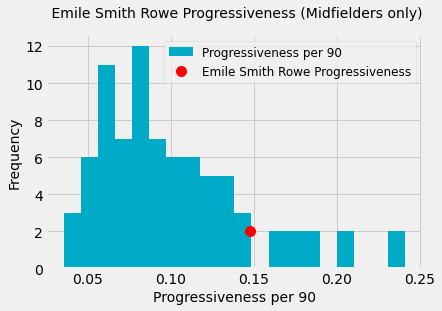

In [67]:
Progressiveness('Emile Smith Rowe')

### Notice the top 3 young progressive midfielders all play for Liverpool - Shows the type of play style Klopp wanted

In [131]:
Top_young_progressive_midfielder_outsideTop6 = Top_young_progressive_midfield[~Top_young_progressive_midfield['Team'].isin(['Arsenal', 'Manchester City', 'Chelsea', 'Liverpool', 'Tottenham Hotspur', 'Manchester United'])]
Top_young_progressive_midfielder_outsideTop6 = Top_young_progressive_midfielder_outsideTop6.head(12)
Top_young_progressive_midfielder_outsideTop6 = Top_young_progressive_midfielder_outsideTop6.reset_index()
del Top_young_progressive_midfielder_outsideTop6['index']
Top_young_progressive_midfielder_outsideTop6

Player Pos   Age     Min  PrgC   PrgP  PrgR  \
0   Joe Willock           MF  23.0  419.0   16.0  17.0   26.0   
1   Mikkel Damsgaard      MF  23.0  842.0   16.0  61.0   32.0   
2   Billy Gilmour         MF  22.0  2120.0  39.0  193.0  33.0   
3   Yehor Yarmoliuk       MF  19.0  688.0   13.0  35.0   36.0   
4   Sandro Tonali         MF  23.0  438.0   11.0  19.0   21.0   
5   Alex Scott            MF  19.0  1014.0  24.0  50.0   35.0   
6   Lewis Miley           MF  17.0  1202.0  14.0  53.0   54.0   
7   Tommy Doyle           MF  21.0  1222.0  21.0  81.0   17.0   
8   Albert Sambi Lokonga  MF  23.0  1303.0  29.0  72.0   13.0   
9   Anis Ben Slimane      MF  22.0  419.0   3.0   12.0   21.0   
10  Amadou Onana          MF  21.0  2091.0  21.0  107.0  39.0   
11  Adam Wharton          MF  19.0  1297.0  14.0  79.0   10.0   

                Team  Progressiveness  Progressiveness per 90  
0   Newcastle United  59.0             12.673031               
1   Brentford         109.0            11.650831               
2   Brighton          265.0            11.250000               
3   Brentford         84.0             10.988372               
4   Newcastle United  51.0             10.479452               
5   Bournemouth       109.0            9.674556                
6   Newcastle United  121.0            9.059900                
7   Wolverhampton     119.0            8.764321                
8   Luton Town        114.0            7.874137                
9   Sheffield United  36.0             7.732697                
10  Everton           167.0            7.187948                
11  Crystal Palace    103.0            7.147263

In [69]:
young_reg_players = regular_players['Age'] < 24
young_regular_players = regular_players[young_reg_players]
young_regular_players.head()

Player   Nation    Pos   Age  MP  Starts     Min   90s   Gls  Ast  \
1   Phil Foden      eng ENG  FW,MF  23.0  35  33      2857.0  31.7  19.0  8.0   
3   Julián Álvarez  ar ARG   MF,FW  23.0  36  31      2647.0  29.4  11.0  8.0   
6   Erling Haaland  no NOR   FW     23.0  31  29      2552.0  28.4  27.0  5.0   
9   Joško Gvardiol  hr CRO   DF     21.0  28  26      2328.0  25.9  4.0   1.0   
11  Jeremy Doku     be BEL   FW,MF  21.0  29  18      1595.0  17.7  3.0   8.0   

    ...  Ast_90  G+A_90  G-PK_90  G+A-PK_90  xG_90  xAG_90  xG+xAG_90  \
1   ...  0.25    0.85    0.60     0.85       0.33   0.26    0.59        
3   ...  0.27    0.65    0.31     0.58       0.44   0.22    0.66        
6   ...  0.18    1.13    0.71     0.88       1.03   0.15    1.18        
9   ...  0.04    0.19    0.15     0.19       0.12   0.06    0.18        
11  ...  0.45    0.62    0.17     0.62       0.14   0.26    0.40        

    npxG_90  npxG+xAG_90             Team  
1   0.33     0.59         Manchester City  
3   0.39     0.61         Manchester City  
6   0.81     0.96         Manchester City  
9   0.12     0.18         Manchester City  
11  0.14     0.40         Manchester City  

[5 rows x 34 columns]

In [70]:
Most_played_youngsters = young_regular_players.sort_values('Min', ascending=False)
Most_played_youngsters = Most_played_youngsters[['Player', 'Pos', 'Age', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'Team']]
Most_played_youngsters.head(20)

Player    Pos   Age  MP  Starts     Min   Gls   Ast  \
55   William Saliba      DF     22.0  38  38      3420.0  2.0   1.0    
368  Illia Zabarnyi      DF     20.0  37  37      3330.0  1.0   0.0    
262  Tyrick Mitchell     DF,MF  23.0  37  37      3204.0  2.0   3.0    
453  Morgan Gibbs-White  MF,FW  23.0  37  35      3156.0  5.0   10.0   
80   Conor Gallagher     MF     23.0  37  37      3128.0  5.0   7.0    
314  Jarrad Branthwaite  DF     21.0  35  35      3116.0  3.0   0.0    
145  Pedro Porro         DF     23.0  35  35      3089.0  3.0   7.0    
315  James Garner        MF     22.0  37  34      3004.0  1.0   2.0    
487  Alfie Doughty       DF     23.0  37  34      2925.0  2.0   8.0    
59   Bukayo Saka         FW     21.0  35  35      2919.0  16.0  9.0    
316  Dwight McNeil       MF,FW  23.0  35  33      2892.0  3.0   6.0    
114  Anthony Gordon      FW     22.0  35  34      2890.0  11.0  10.0   
81   Moisés Caicedo      MF     21.0  35  33      2866.0  1.0   3.0    
1    Phil Foden          FW,MF  23.0  35  33      2857.0  19.0  8.0    
82   Nicolas Jackson     FW     22.0  35  31      2799.0  14.0  5.0    
454  Murillo             DF     21.0  32  32      2789.0  0.0   2.0    
546  Jayden Bogle        DF     23.0  34  32      2788.0  3.0   0.0    
148  Dejan Kulusevski    FW,MF  23.0  36  31      2762.0  8.0   3.0    
428  Nathan Collins      DF     22.0  32  29      2652.0  1.0   1.0    
402  João Gomes          MF     22.0  34  32      2649.0  2.0   1.0    

                  Team  
55   Arsenal            
368  Bournemouth        
262  Crystal Palace     
453  Nottingham Forest  
80   Chelsea            
314  Everton            
145  Tottenham Hotspur  
315  Everton            
487  Luton Town         
59   Arsenal            
316  Everton            
114  Newcastle United   
81   Chelsea            
1    Manchester City    
82   Chelsea            
454  Nottingham Forest  
546  Sheffield United   
148  Tottenham Hotspur  
428  Brentford          
402  Wolverhampton

In [71]:
most_played_teens = Most_played_youngsters['Age'] < 20
most_played_teenagers = Most_played_youngsters[most_played_teens]
most_played_teenagers.head(15)

Player    Pos   Age  MP  Starts     Min  Gls  Ast  \
176  Alejandro Garnacho  FW     19.0  36  30      2565.0  7.0  4.0   
520  Wilson Odobert      MF,FW  18.0  29  25      2098.0  3.0  2.0   
378  Milos Kerkez        DF     19.0  28  22      1970.0  0.0  1.0   
180  Kobbie Mainoo       MF     18.0  24  24      1924.0  3.0  1.0   
351  Evan Ferguson       FW     18.0  27  15      1367.0  6.0  0.0   
349  Facundo Buonanotte  FW,MF  18.0  27  17      1364.0  3.0  1.0   
352  Carlos Baleba       MF     19.0  27  15      1325.0  0.0  0.0   
276  Adam Wharton        MF     19.0  16  15      1297.0  0.0  3.0   
124  Lewis Miley         MF     17.0  17  14      1202.0  1.0  3.0   
383  Alex Scott          MF     19.0  23  11      1014.0  1.0  1.0   
528  Luca Koleosho       MF,FW  18.0  15  13      974.0   1.0  1.0   
560  Oliver Arblaster    MF     19.0  12  11      943.0   0.0  0.0   
558  Andre Brooks        MF,DF  19.0  20  12      938.0   0.0  0.0   
358  Jack Hinshelwood    DF     18.0  12  8       869.0   3.0  0.0   
16   Rico Lewis          DF,MF  18.0  16  8       809.0   2.0  0.0   

                  Team  
176  Manchester United  
520  Burnley            
378  Bournemouth        
180  Manchester United  
351  Brighton           
349  Brighton           
352  Brighton           
276  Crystal Palace     
124  Newcastle United   
383  Bournemouth        
528  Burnley            
560  Sheffield United   
558  Sheffield United   
358  Brighton           
16   Manchester City

In [72]:
progressive.head()

Player    Pos   Age     Min  PrgC   PrgP   PrgR             Team  \
0  Rodri           MF     27.0  2931.0  76.0  376.0  55.0   Manchester City   
1  Phil Foden      FW,MF  23.0  2857.0  93.0  168.0  269.0  Manchester City   
2  Ederson         GK     29.0  2785.0  0.0   4.0    0.0    Manchester City   
3  Julián Álvarez  MF,FW  23.0  2647.0  64.0  103.0  180.0  Manchester City   
4  Kyle Walker     DF     33.0  2767.0  74.0  157.0  172.0  Manchester City   

   Progressiveness  Progressiveness per 90  
0  507.0            15.568066               
1  530.0            16.695835               
2  4.0              0.129264                
3  347.0            11.798262               
4  403.0            13.108059

### Progressive Teams

In [73]:
by_team = progressive.groupby('Team')
by_team

In [74]:
#team_means = by_team.aggregate(np.mean)
#team_means = by_team.aggregate("mean")
#team_means = by_team[['column1', 'column2', 'column3']].aggregate("mean")
# Select only numeric columns from the original DataFrame
# Assuming by_team is already a GroupBy object
# Select only numeric columns for aggregation
numeric_columns = progressive.select_dtypes(include='number')

# Aggregate by applying mean on the numeric columns in the groupby object
team_means = by_team[numeric_columns.columns].mean()


top_progressive_teams = team_means.sort_values('Progressiveness per 90', ascending=False)
top_progressive_teams

Age          Min       PrgC       PrgP       PrgR  \
Team                                                                         
Tottenham Hotspur  24.172414  1291.689655  33.000000  72.655172  72.310345   
Liverpool          23.833333  1247.800000  30.800000  70.333333  69.700000   
Wolverhampton      24.592593  1389.000000  24.851852  43.703704  43.074074   
Arsenal            24.800000  1503.520000  32.840000  84.240000  83.520000   
Manchester City    25.520000  1502.960000  45.080000  82.400000  81.280000   
Brentford          25.285714  1339.892857  18.035714  45.821429  45.571429   
Brighton           24.366667  1252.333333  28.800000  59.333333  58.900000   
Aston Villa        25.258065  1212.677419  25.000000  46.806452  46.387097   
Manchester United  24.516129  1213.516129  24.483871  47.709677  47.322581   
Newcastle United   25.343750  1175.593750  23.031250  48.656250  48.281250   
Bournemouth        24.633333  1252.133333  23.633333  43.800000  43.200000   
Burnley            24.290323  1207.709677  23.451613  38.096774  37.483871   
Chelsea            22.031250  1172.500000  27.281250  50.468750  50.000000   
Fulham             27.160000  1500.600000  26.800000  58.680000  58.080000   
Crystal Palace     25.653846  1446.076923  19.461538  45.230769  44.653846   
West Ham United    27.000000  1445.192308  21.384615  46.423077  45.846154   
Nottingham Forest  25.272727  1136.151515  18.303030  34.545455  34.000000   
Everton            25.615385  1444.846154  19.038462  43.423077  43.038462   
Luton Town         25.892857  1343.571429  24.107143  39.750000  39.071429   
Sheffield United   24.142857  1071.228571  9.800000   25.257143  24.971429   

                   Progressiveness  Progressiveness per 90  
Team                                                        
Tottenham Hotspur  177.965517       17.081334               
Liverpool          170.833333       14.683878               
Wolverhampton      111.629630       13.922312               
Arsenal            200.600000       12.820604               
Manchester City    208.760000       11.999519               
Brentford          109.428571       10.717148               
Brighton           147.033333       10.516782               
Aston Villa        118.193548       10.254008               
Manchester United  119.516129       9.995876                
Newcastle United   119.968750       9.712503                
Bournemouth        110.633333       9.394087                
Burnley            99.032258        9.189600                
Chelsea            127.750000       8.907608                
Fulham             143.560000       8.831306                
Crystal Palace     109.346154       7.539696                
West Ham United    113.653846       7.378756                
Nottingham Forest  86.848485        6.998350                
Everton            105.500000       6.771552                
Luton Town         102.928571       6.290975                
Sheffield United   60.028571        5.282195

In [75]:
regular_players.head()

Player   Nation    Pos   Age  MP  Starts     Min   90s   Gls  Ast  \
0  Rodri           es ESP   MF     27.0  34  34      2931.0  32.6  8.0   9.0   
1  Phil Foden      eng ENG  FW,MF  23.0  35  33      2857.0  31.7  19.0  8.0   
2  Ederson         br BRA   GK     29.0  33  33      2785.0  30.9  0.0   0.0   
3  Julián Álvarez  ar ARG   MF,FW  23.0  36  31      2647.0  29.4  11.0  8.0   
4  Kyle Walker     eng ENG  DF     33.0  32  30      2767.0  30.7  0.0   4.0   

   ...  Ast_90  G+A_90  G-PK_90  G+A-PK_90  xG_90  xAG_90  xG+xAG_90  npxG_90  \
0  ...  0.28    0.52    0.25     0.52       0.12   0.12    0.24       0.12      
1  ...  0.25    0.85    0.60     0.85       0.33   0.26    0.59       0.33      
2  ...  0.00    0.00    0.00     0.00       0.00   0.00    0.00       0.00      
3  ...  0.27    0.65    0.31     0.58       0.44   0.22    0.66       0.39      
4  ...  0.13    0.13    0.00     0.13       0.01   0.09    0.10       0.01      

   npxG+xAG_90             Team  
0  0.24         Manchester City  
1  0.59         Manchester City  
2  0.00         Manchester City  
3  0.61         Manchester City  
4  0.10         Manchester City  

[5 rows x 34 columns]

In [76]:
age_team = regular_players.groupby('Team')
age_team

In [77]:
#team_means = by_team.aggregate("mean")
#team_means = by_team[['column1', 'column2', 'column3']].aggregate("mean")
#age_team_means = age_team.aggregate("mean")
#age_team_means = age_team[['Age']].aggregate("mean")
#youngest_teams = age_team_means.sort_values('Age', ascending=True)
#youngest_teams = youngest_teams[['Age']]
#youngest_teams
#oldest_teams = youngest_teams.sort_values('Age', ascending=False)
#oldest_teams

In [78]:
youngest_teams = top_progressive_teams[['Age']].sort_values(by='Age', ascending=True)
oldest_teams = top_progressive_teams[['Age']].sort_values(by='Age', ascending=False)

In [79]:
youngest_teams.head()

Age
Team                        
Chelsea            22.031250
Liverpool          23.833333
Sheffield United   24.142857
Tottenham Hotspur  24.172414
Burnley            24.290323

In [80]:
oldest_teams.head()

Age
Team                      
Fulham           27.160000
West Ham United  27.000000
Luton Town       25.892857
Crystal Palace   25.653846
Everton          25.615385

Most imporntant players per team - make a function   - rank high for goals / assits / progressive
- does this reflect their salary - find another salary dataset?

In [81]:
regular_players_GA.head()

Player    Pos     Min   Gls   PK  Ast   G+A    xG  xG_90  xAG  \
0  Rodri           MF     2931.0  8.0   0.0  9.0  17.0  4.1   0.12   3.9   
1  Phil Foden      FW,MF  2857.0  19.0  0.0  8.0  27.0  10.3  0.33   8.4   
2  Ederson         GK     2785.0  0.0   0.0  0.0  0.0   0.0   0.00   0.1   
3  Julián Álvarez  MF,FW  2647.0  11.0  2.0  8.0  19.0  13.0  0.44   6.4   
4  Kyle Walker     DF     2767.0  0.0   0.0  4.0  4.0   0.4   0.01   2.6   

   xAG_90  xG+xAG_90             Team  xG + xAG  Gls - XG  Ast - XAG  
0  0.12    0.24       Manchester City  8.0       3.9       5.1        
1  0.26    0.59       Manchester City  18.7      8.7      -0.4        
2  0.00    0.00       Manchester City  0.1       0.0      -0.1        
3  0.22    0.66       Manchester City  19.4     -2.0       1.6        
4  0.09    0.10       Manchester City  3.0      -0.4       1.4

In [82]:
man_city_bool = regular_players_GA['Team'] == 'Manchester City'
man_city = regular_players_GA[man_city_bool]
man_city.sort_values('Gls - XG', ascending=False)


Player    Pos     Min   Gls   PK   Ast   G+A    xG  xG_90   xAG  \
1   Phil Foden       FW,MF  2857.0  19.0  0.0  8.0   27.0  10.3  0.33   8.4    
0   Rodri            MF     2931.0  8.0   0.0  9.0   17.0  4.1   0.12   3.9    
5   Bernardo Silva   MF,FW  2578.0  6.0   0.0  9.0   15.0  3.7   0.13   7.6    
13  Kevin De Bruyne  MF     1221.0  4.0   0.0  10.0  14.0  2.4   0.18   11.5   
16  Rico Lewis       DF,MF  809.0   2.0   0.0  0.0   2.0   0.6   0.07   1.1    
15  Jack Grealish    FW,MF  1009.0  3.0   0.0  1.0   4.0   2.1   0.19   2.5    
9   Joško Gvardiol   DF     2328.0  4.0   0.0  1.0   5.0   3.1   0.12   1.4    
11  Jeremy Doku      FW,MF  1595.0  3.0   0.0  8.0   11.0  2.5   0.14   4.6    
8   Manuel Akanji    DF,MF  2511.0  2.0   0.0  0.0   2.0   1.9   0.07   0.5    
14  John Stones      DF,MF  1064.0  1.0   0.0  0.0   1.0   1.0   0.09   0.2    
2   Ederson          GK     2785.0  0.0   0.0  0.0   0.0   0.0   0.00   0.1    
18  Stefan Ortega    GK     635.0   0.0   0.0  0.0   0.0   0.0   0.00   0.0    
12  Mateo Kovačić    MF     1551.0  1.0   0.0  0.0   1.0   1.3   0.07   1.6    
4   Kyle Walker      DF     2767.0  0.0   0.0  4.0   4.0   0.4   0.01   2.6    
10  Nathan Aké       DF     2042.0  2.0   0.0  2.0   4.0   2.5   0.11   1.2    
17  Matheus Nunes    MF     661.0   0.0   0.0  2.0   2.0   0.8   0.11   1.1    
7   Rúben Dias       DF     2559.0  0.0   0.0  0.0   0.0   1.4   0.05   0.3    
3   Julián Álvarez   MF,FW  2647.0  11.0  2.0  8.0   19.0  13.0  0.44   6.4    
6   Erling Haaland   FW     2552.0  27.0  7.0  5.0   32.0  29.2  1.03   4.3    

    xAG_90  xG+xAG_90             Team  xG + xAG  Gls - XG  Ast - XAG  
1   0.26    0.59       Manchester City  18.7      8.7      -0.4        
0   0.12    0.24       Manchester City  8.0       3.9       5.1        
5   0.27    0.40       Manchester City  11.3      2.3       1.4        
13  0.85    1.03       Manchester City  13.9      1.6      -1.5        
16  0.12    0.19       Manchester City  1.7       1.4      -1.1        
15  0.22    0.41       Manchester City  4.6       0.9      -1.5        
9   0.06    0.18       Manchester City  4.5       0.9      -0.4        
11  0.26    0.40       Manchester City  7.1       0.5       3.4        
8   0.02    0.09       Manchester City  2.4       0.1      -0.5        
14  0.02    0.11       Manchester City  1.2       0.0      -0.2        
2   0.00    0.00       Manchester City  0.1       0.0      -0.1        
18  0.00    0.00       Manchester City  0.0       0.0       0.0        
12  0.09    0.17       Manchester City  2.9      -0.3      -1.6        
4   0.09    0.10       Manchester City  3.0      -0.4       1.4        
10  0.05    0.16       Manchester City  3.7      -0.5       0.8        
17  0.15    0.27       Manchester City  1.9      -0.8       0.9        
7   0.01    0.06       Manchester City  1.7      -1.4      -0.3        
3   0.22    0.66       Manchester City  19.4     -2.0       1.6        
6   0.15    1.18       Manchester City  33.5     -2.2       0.7

### Haaland actually should have scored more - if based on expected goals - not as clinical finisher as everyone thinks?

In [83]:
man_city.sort_values('xAG_90', ascending=False)


Player    Pos     Min   Gls   PK   Ast   G+A    xG  xG_90   xAG  \
13  Kevin De Bruyne  MF     1221.0  4.0   0.0  10.0  14.0  2.4   0.18   11.5   
5   Bernardo Silva   MF,FW  2578.0  6.0   0.0  9.0   15.0  3.7   0.13   7.6    
1   Phil Foden       FW,MF  2857.0  19.0  0.0  8.0   27.0  10.3  0.33   8.4    
11  Jeremy Doku      FW,MF  1595.0  3.0   0.0  8.0   11.0  2.5   0.14   4.6    
3   Julián Álvarez   MF,FW  2647.0  11.0  2.0  8.0   19.0  13.0  0.44   6.4    
15  Jack Grealish    FW,MF  1009.0  3.0   0.0  1.0   4.0   2.1   0.19   2.5    
17  Matheus Nunes    MF     661.0   0.0   0.0  2.0   2.0   0.8   0.11   1.1    
6   Erling Haaland   FW     2552.0  27.0  7.0  5.0   32.0  29.2  1.03   4.3    
0   Rodri            MF     2931.0  8.0   0.0  9.0   17.0  4.1   0.12   3.9    
16  Rico Lewis       DF,MF  809.0   2.0   0.0  0.0   2.0   0.6   0.07   1.1    
12  Mateo Kovačić    MF     1551.0  1.0   0.0  0.0   1.0   1.3   0.07   1.6    
4   Kyle Walker      DF     2767.0  0.0   0.0  4.0   4.0   0.4   0.01   2.6    
9   Joško Gvardiol   DF     2328.0  4.0   0.0  1.0   5.0   3.1   0.12   1.4    
10  Nathan Aké       DF     2042.0  2.0   0.0  2.0   4.0   2.5   0.11   1.2    
14  John Stones      DF,MF  1064.0  1.0   0.0  0.0   1.0   1.0   0.09   0.2    
8   Manuel Akanji    DF,MF  2511.0  2.0   0.0  0.0   2.0   1.9   0.07   0.5    
7   Rúben Dias       DF     2559.0  0.0   0.0  0.0   0.0   1.4   0.05   0.3    
2   Ederson          GK     2785.0  0.0   0.0  0.0   0.0   0.0   0.00   0.1    
18  Stefan Ortega    GK     635.0   0.0   0.0  0.0   0.0   0.0   0.00   0.0    

    xAG_90  xG+xAG_90             Team  xG + xAG  Gls - XG  Ast - XAG  
13  0.85    1.03       Manchester City  13.9      1.6      -1.5        
5   0.27    0.40       Manchester City  11.3      2.3       1.4        
1   0.26    0.59       Manchester City  18.7      8.7      -0.4        
11  0.26    0.40       Manchester City  7.1       0.5       3.4        
3   0.22    0.66       Manchester City  19.4     -2.0       1.6        
15  0.22    0.41       Manchester City  4.6       0.9      -1.5        
17  0.15    0.27       Manchester City  1.9      -0.8       0.9        
6   0.15    1.18       Manchester City  33.5     -2.2       0.7        
0   0.12    0.24       Manchester City  8.0       3.9       5.1        
16  0.12    0.19       Manchester City  1.7       1.4      -1.1        
12  0.09    0.17       Manchester City  2.9      -0.3      -1.6        
4   0.09    0.10       Manchester City  3.0      -0.4       1.4        
9   0.06    0.18       Manchester City  4.5       0.9      -0.4        
10  0.05    0.16       Manchester City  3.7      -0.5       0.8        
14  0.02    0.11       Manchester City  1.2       0.0      -0.2        
8   0.02    0.09       Manchester City  2.4       0.1      -0.5        
7   0.01    0.06       Manchester City  1.7      -1.4      -0.3        
2   0.00    0.00       Manchester City  0.1       0.0      -0.1        
18  0.00    0.00       Manchester City  0.0       0.0       0.0

### Salaries from 2022/23 season   player data from 2023/24 season

#### Salary dataset from Kaggle 'EPL salaries' https://www.kaggle.com/datasets/darrylljk/epl-soccer-player-salaries

In [84]:
salaries = pd.read_csv('premier-player-23-24 - with salaries.csv')
salaries.head()

Player   Nation Weekly Wage  Unnamed: 3 Yearly Salary  \
0  Álex Moreno       es ESP   £90,000    NaN          £4,680,000     
1  Đorđe Petrović    rs SRB   £70,000    NaN          £3,640,000     
2  Łukasz Fabiański  pl POL   £60,000    NaN          £3,120,000     
3  Aaron Cresswell   eng ENG  £53,000    NaN          £2,756,000     
4  Aaron Hickey      sct SCO  £35,000    NaN          £1,820,000     

   Unnamed: 5    Pos  Age  MP  Starts  ...  Ast_90  G+A_90  G-PK_90  \
0 NaN          DF     30   21  11      ...  0.0     0.17    0.17      
1 NaN          GK     23   23  22      ...  0.0     0.00    0.00      
2 NaN          GK     38   10  7       ...  0.0     0.00    0.00      
3 NaN          DF,FW  33   11  4       ...  0.0     0.00    0.00      
4 NaN          DF     21   9   9       ...  0.0     0.00    0.00      

   G+A-PK_90  xG_90  xAG_90  xG+xAG_90  npxG_90  npxG+xAG_90             Team  
0  0.17       0.10   0.10    0.20       0.10     0.20         Aston Villa      
1  0.00       0.00   0.00    0.00       0.00     0.00         Chelsea          
2  0.00       0.00   0.00    0.00       0.00     0.00         West Ham United  
3  0.00       0.00   0.09    0.09       0.00     0.09         West Ham United  
4  0.00       0.03   0.01    0.04       0.03     0.04         Brentford        

[5 rows x 38 columns]

In [85]:
# Assuming 'column_name' is the column you want to convert
# Assuming 'salary' is the column with the values like '£4,680,000'

# Step 1: Remove the '£' symbol and commas
salaries['Yearly Salary'] = salaries['Yearly Salary'].str.replace('£', '').str.replace(',', '')

# Step 2: Convert the cleaned string to integer
salaries['Yearly Salary'] = salaries['Yearly Salary'].astype(int)

salaries['Weekly Wage'] = salaries['Weekly Wage'].str.replace('£', '').str.replace(',', '')

# Step 2: Convert the cleaned string to integer
salaries['Weekly Wage'] = salaries['Weekly Wage'].astype(int)


In [140]:
top_salaries = salaries.sort_values(by='Yearly Salary', ascending=False)
top12_salaries = top_salaries.head(12)
top12_salaries


Player   Nation  Weekly Wage  Unnamed: 3  Yearly Salary  \
372  Raheem Sterling     eng ENG  350000      NaN          18200000        
328  Mohamed Salah       eg EGY   350000      NaN          18200000        
374  Raphaël Varane      fr FRA   350000      NaN          18200000        
144  Erling Haaland      no NOR   340000      NaN          17680000        
257  Kevin De Bruyne     be BEL   340000      NaN          17680000        
297  Marcus Rashford     eng ENG  300000      NaN          15600000        
84   Casemiro            br BRA   300000      NaN          15600000        
96   Christopher Nkunku  fr FRA   300000      NaN          15600000        
195  Jadon Sancho        eng ENG  275000      NaN          14300000        
188  Jack Grealish       eng ENG  270000      NaN          14040000        
69   Bruno Fernandes     pt POR   250000      NaN          13000000        
72   Bukayo Saka         eng ENG  250000      NaN          13000000        

     Unnamed: 5    Pos  Age  MP  Starts  ...  Ast_90  G+A_90  G-PK_90  \
372 NaN          FW,MF  28   31  22      ...  0.18    0.55    0.36      
328 NaN          FW     31   32  28      ...  0.36    0.99    0.46      
374 NaN          DF     30   22  16      ...  0.00    0.07    0.07      
144 NaN          FW     23   31  29      ...  0.18    1.13    0.71      
257 NaN          MF     32   18  15      ...  0.74    1.03    0.29      
297 NaN          FW     25   33  26      ...  0.08    0.36    0.20      
84  NaN          MF,DF  31   25  24      ...  0.09    0.14    0.05      
96  NaN          FW,MF  25   11  2       ...  0.00    0.61    0.61      
195 NaN          FW,MF  23   3   0       ...  0.00    0.00    0.00      
188 NaN          FW,MF  27   20  10      ...  0.09    0.36    0.27      
69  NaN          MF,FW  28   35  35      ...  0.23    0.52    0.17      
72  NaN          FW     21   35  35      ...  0.28    0.77    0.31      

     G+A-PK_90  xG_90  xAG_90  xG+xAG_90  npxG_90  npxG+xAG_90  \
372  0.55       0.29   0.20    0.50       0.29     0.50          
328  0.82       0.75   0.42    1.17       0.55     0.97          
374  0.07       0.08   0.00    0.09       0.08     0.09          
144  0.88       1.03   0.15    1.18       0.81     0.96          
257  1.03       0.18   0.85    1.03       0.18     1.03          
297  0.28       0.29   0.09    0.38       0.23     0.32          
84   0.14       0.16   0.05    0.20       0.16     0.20          
96   0.61       0.47   0.05    0.52       0.47     0.52          
195  0.00       0.00   0.06    0.06       0.00     0.06          
188  0.36       0.19   0.22    0.41       0.19     0.41          
69   0.40       0.29   0.34    0.63       0.18     0.51          
72   0.59       0.48   0.32    0.80       0.33     0.65          

                  Team  
372  Chelsea            
328  Liverpool          
374  Manchester United  
144  Manchester City    
257  Manchester City    
297  Manchester United  
84   Manchester United  
96   Chelsea            
195  Manchester United  
188  Manchester City    
69   Manchester United  
72   Arsenal            

[12 rows x 38 columns]

see salaries comparison between people on graphs made above - copy code on regular_players dataset - but on salaries dataset to get same players but with salaries

In [87]:
by_team = salaries.groupby('Team')
by_team

## Average salary per team

In [88]:
team_means = by_team[['Yearly Salary']].aggregate("mean").sort_values(by='Yearly Salary', ascending=False).round()
team_means

Yearly Salary
Team                            
Manchester City    8192080.0    
Manchester United  7750080.0    
Arsenal            6527130.0    
Liverpool          6081739.0    
Chelsea            5934000.0    
Tottenham Hotspur  5455273.0    
Aston Villa        4402667.0    
West Ham United    4180800.0    
Newcastle United   3642167.0    
Everton            3410160.0    
Fulham             2724348.0    
Crystal Palace     2520019.0    
Brighton           2502240.0    
Wolverhampton      2493920.0    
Nottingham Forest  2390000.0    
Bournemouth        2359810.0    
Brentford          1592933.0    
Burnley            1405926.0    
Luton Town         1398800.0    
Sheffield United   1090983.0

In [89]:
salaries

Player   Nation  Weekly Wage  Unnamed: 3  Yearly Salary  \
0    Álex Moreno       es ESP   90000       NaN          4680000         
1    Đorđe Petrović    rs SRB   70000       NaN          3640000         
2    Łukasz Fabiański  pl POL   60000       NaN          3120000         
3    Aaron Cresswell   eng ENG  53000       NaN          2756000         
4    Aaron Hickey      sct SCO  35000       NaN          1820000         
..            ...          ...    ...        ..              ...         
458  Yoane Wissa       cd COD   26000       NaN          1352000         
459  Youri Tielemans   be BEL   150000      NaN          7800000         
460  Youssef Chermiti  pt POR   23000       NaN          1196000         
461  Yves Bissouma     ml MLI   100000      NaN          5200000         
462  Zeki Amdouni      ch SUI   45000       NaN          2340000         

     Unnamed: 5    Pos  Age  MP  Starts  ...  Ast_90  G+A_90  G-PK_90  \
0   NaN          DF     30   21  11      ...  0.00    0.17    0.17      
1   NaN          GK     23   23  22      ...  0.00    0.00    0.00      
2   NaN          GK     38   10  7       ...  0.00    0.00    0.00      
3   NaN          DF,FW  33   11  4       ...  0.00    0.00    0.00      
4   NaN          DF     21   9   9       ...  0.00    0.00    0.00      
..   ..          ..     ..  ..  ..       ...   ...     ...     ...      
458 NaN          FW     26   34  29      ...  0.11    0.54    0.43      
459 NaN          MF,FW  26   32  17      ...  0.33    0.44    0.11      
460 NaN          FW     19   18  1       ...  0.00    0.00    0.00      
461 NaN          MF     26   28  26      ...  0.00    0.00    0.00      
462 NaN          FW     22   34  27      ...  0.05    0.28    0.18      

     G+A-PK_90  xG_90  xAG_90  xG+xAG_90  npxG_90  npxG+xAG_90  \
0    0.17       0.10   0.10    0.20       0.10     0.20          
1    0.00       0.00   0.00    0.00       0.00     0.00          
2    0.00       0.00   0.00    0.00       0.00     0.00          
3    0.00       0.00   0.09    0.09       0.00     0.09          
4    0.00       0.03   0.01    0.04       0.03     0.04          
..    ...        ...    ...     ...        ...      ...          
458  0.54       0.38   0.14    0.52       0.38     0.52          
459  0.44       0.07   0.14    0.21       0.07     0.21          
460  0.00       0.31   0.34    0.65       0.31     0.65          
461  0.00       0.06   0.02    0.08       0.06     0.08          
462  0.23       0.27   0.07    0.33       0.23     0.30          

                  Team  
0    Aston Villa        
1    Chelsea            
2    West Ham United    
3    West Ham United    
4    Brentford          
..         ...          
458  Brentford          
459  Aston Villa        
460  Everton            
461  Tottenham Hotspur  
462  Burnley            

[463 rows x 38 columns]

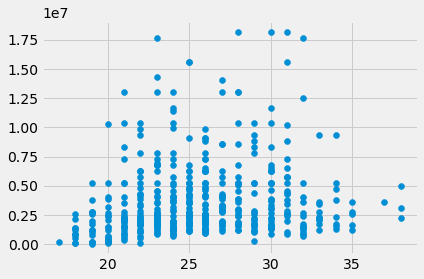

In [90]:
plt.scatter(salaries['Age'], salaries['Yearly Salary'])

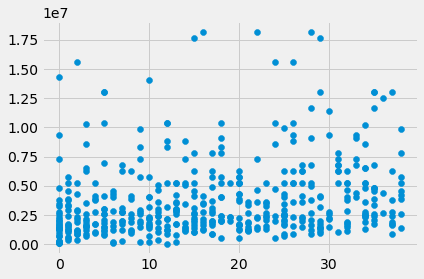

In [91]:
plt.scatter(salaries['Starts'], salaries['Yearly Salary'])

<Axes: xlabel='Age', ylabel='Starts'>

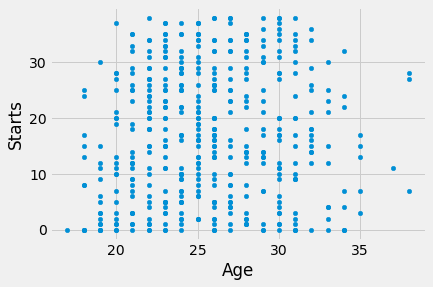

In [92]:
salaries.plot.scatter('Age', 'Starts')

In [93]:
def r_scatter(r):
    plt.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plt.scatter(x, y)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)

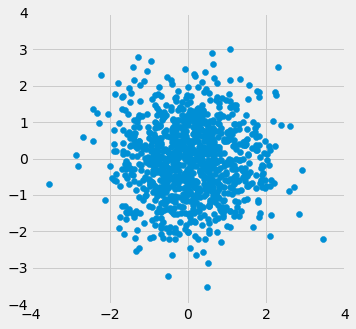

In [94]:
r_scatter(0)

In [95]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.mean(x))/np.std(x)

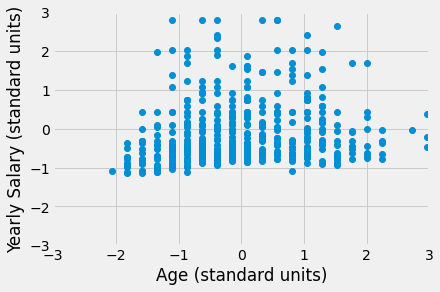

In [96]:
age_su = standard_units(salaries['Age'])
salary_su = standard_units(salaries['Yearly Salary'])
plt.plot(age_su, salary_su, 'o')
plt.xlabel('Age (standard units)')
plt.ylabel('Yearly Salary (standard units)')
plt.xlim(-3, 3)
plt.ylim(-3, 3);

In [97]:
def ss_any_line(c_s, x_values, y_values):
    c, s = c_s
    predicted = c + x_values * s
    error = y_values - predicted
    return np.sum(error ** 2)

In [98]:
from scipy.optimize import minimize
best_c, best_s = minimize(ss_any_line, [0, -0.5],
                          args=(age_su, salary_su)).x
print('Intercept', best_c)
print('Slope', best_s)

Intercept -3.149823444527144e-09
Slope 0.16634110852400313


In [99]:
def correlation(t, x_name, y_name):
    """ Correlation by calculation
    """
    x = t[x_name]
    y = t[y_name]
    return np.mean(standard_units(x) * standard_units(y))

In [100]:
def correlation_minimize(t, x_name, y_name):
    """ Correlation by minimization
    """
    x = t[x_name]
    y = t[y_name]
    x_su, y_su = standard_units(x), standard_units(y)
    intercept, slope = minimize(ss_any_line, [0, 1], args=(x_su, y_su)).x
    if not np.isclose(intercept, 0):
        print('Oh dear, intercept not near 0')
    return slope

In [101]:
correlation(salaries, 'Age', 'Yearly Salary')

0.1663411118575806

In [102]:
correlation(salaries, 'Starts', 'Yearly Salary')

0.22958375520360713

In [103]:
correlation(salaries, 'Weekly Wage', 'Yearly Salary')

1.0

In [104]:
salaries_GA = salaries[['Player', 'Weekly Wage', 'Yearly Salary', 'Pos', 'Min', 'Gls', 'PK', 'Ast', 'G+A', 'xG','xG_90', 'xAG', 'xAG_90', 'xG+xAG_90', 'Team']]
salaries_xG = salaries_GA['xG']
salaries_xAG = salaries_GA['xAG']
salaries_xG_xAG = salaries_xG + salaries_xAG
salaries_GA['xG + xAG'] = salaries_xG_xAG
salaries_GA['Gls - XG'] = salaries['Gls'] - salaries['xG']
salaries_GA['Ast - XAG'] = salaries_GA['Ast'] - salaries_GA['xAG']
salaries_GA.head()

C:\Users\joshj\AppData\Local\Temp/ipykernel_23612/1331790752.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaries_GA['xG + xAG'] = salaries_xG_xAG
C:\Users\joshj\AppData\Local\Temp/ipykernel_23612/1331790752.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaries_GA['Gls - XG'] = salaries['Gls'] - salaries['xG']
C:\Users\joshj\AppData\Local\Temp/ipykernel_23612/1331790752.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

Player  Weekly Wage  Yearly Salary    Pos   Min  Gls  PK  Ast  \
0  Álex Moreno       90000        4680000        DF     1031  2    0   0     
1  Đorđe Petrović    70000        3640000        GK     1987  0    0   0     
2  Łukasz Fabiański  60000        3120000        GK     721   0    0   0     
3  Aaron Cresswell   53000        2756000        DF,FW  436   0    0   0     
4  Aaron Hickey      35000        1820000        DF     713   0    0   0     

   G+A   xG  xG_90  xAG  xAG_90  xG+xAG_90             Team  xG + xAG  \
0  2    1.1  0.10   1.1  0.10    0.20       Aston Villa      2.2        
1  0    0.0  0.00   0.0  0.00    0.00       Chelsea          0.0        
2  0    0.0  0.00   0.0  0.00    0.00       West Ham United  0.0        
3  0    0.0  0.00   0.4  0.09    0.09       West Ham United  0.4        
4  0    0.2  0.03   0.1  0.01    0.04       Brentford        0.3        

   Gls - XG  Ast - XAG  
0  0.9      -1.1        
1  0.0       0.0        
2  0.0       0.0        
3  0.0      -0.4        
4 -0.2      -0.1

In [105]:
salaries_good_finishers = salaries_GA.sort_values('Gls - XG', ascending = False).head(10)
salaries_good_assisters = salaries_GA.sort_values('Ast - XAG', ascending = False).head(10)
salaries_bad_finishers = salaries_GA.sort_values('Gls - XG', ascending = True).head(10)
salaries_bad_assisters = salaries_GA.sort_values('Ast - XAG', ascending = True).head(10)


### Comparing Salaries between the top finishers -> we only want the attacking players

In [106]:
salaries_GA['Pos'].value_counts()

Pos
DF       144
MF       86 
FW       63 
FW,MF    52 
MF,FW    39 
GK       35 
DF,MF    18 
MF,DF    15 
DF,FW    7  
FW,DF    4  
Name: count, dtype: int64

In [107]:
attacking = (salaries_GA['Pos'] == 'MF,FW') | (salaries_GA['Pos'] == 'FW,MF') | (salaries_GA['Pos'] == 'FW')
attacking_only = salaries_GA[attacking]

In [108]:
# Good finishing and assists combined
attacking_only['(Gls - XG) + xAG'] = (attacking_only['Gls - XG']) + (attacking_only['xAG'])
attacking_only

C:\Users\joshj\AppData\Local\Temp/ipykernel_23612/4047391321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attacking_only['(Gls - XG) + xAG'] = (attacking_only['Gls - XG']) + (attacking_only['xAG'])


Player  Weekly Wage  Yearly Salary    Pos   Min  Gls  PK  \
6    Aaron Ramsey        28000        1456000        MF,FW  527   0    0    
8    Abdoulaye Doucouré  120000       6240000        FW,MF  2629  7    0    
9    Adam Lallana        70000        3640000        MF,FW  850   0    0    
12   Adama Traoré        63000        3276000        FW,MF  377   2    0    
14   Alejandro Garnacho  53000        2756000        FW     2565  7    0    
..                  ...    ...            ...        ..      ... ..   ..    
455  Wilson Odobert      16000        832000         MF,FW  2098  3    0    
458  Yoane Wissa         26000        1352000        FW     2493  12   0    
459  Youri Tielemans     150000       7800000        MF,FW  1622  2    0    
460  Youssef Chermiti    23000        1196000        FW     208   0    0    
462  Zeki Amdouni        45000        2340000        FW     1953  5    1    

     Ast  G+A    xG  xG_90  xAG  xAG_90  xG+xAG_90               Team  \
6    0    0    0.3   0.06   0.4  0.07    0.13       Burnley             
8    1    8    8.8   0.30   2.9  0.10    0.40       Everton             
9    1    1    0.8   0.09   1.7  0.18    0.27       Brighton            
12   3    5    1.5   0.36   0.7  0.17    0.53       Fulham              
14   4    11   8.4   0.29   5.1  0.18    0.47       Manchester United   
..  ..    ..   ...    ...   ...   ...     ...                     ...   
455  2    5    2.8   0.12   3.3  0.14    0.26       Burnley             
458  3    15   10.6  0.38   3.9  0.14    0.52       Brentford           
459  6    8    1.3   0.07   2.6  0.14    0.21       Aston Villa         
460  0    0    0.7   0.31   0.8  0.34    0.65       Everton             
462  1    6    5.8   0.27   1.4  0.07    0.33       Burnley             

     xG + xAG  Gls - XG  Ast - XAG  (Gls - XG) + xAG  
6    0.7      -0.3      -0.4        0.1               
8    11.7     -1.8      -1.9        1.1               
9    2.5      -0.8      -0.7        0.9               
12   2.2       0.5       2.3        1.2               
14   13.5     -1.4      -1.1        3.7               
..    ...      ...       ...        ...               
455  6.1       0.2      -1.3        3.5               
458  14.5      1.4      -0.9        5.3               
459  3.9       0.7       3.4        3.3               
460  1.5      -0.7      -0.8        0.1               
462  7.2      -0.8      -0.4        0.6               

[154 rows x 19 columns]

In [109]:
import plotly.graph_objects as go

In [110]:
fig = go.Figure()

# Add the scatter trace
fig.add_trace(go.Scatter( 
    x=attacking_only['Yearly Salary'], # Variable in the x-axis
    y=attacking_only['G+A'], # Variable in the y-axis
    mode='markers', # This explicitly states that we want our observations to be represented by points
    
    # Properties associated with points 
    marker=dict(
        size=12, # Size
        color='#cb1dd1', # Color
        opacity=0.8, # Point transparency 
        line=dict(width=1, color='black') # Properties of the edges
    ),
))

# Customize the layout
fig.update_layout(
    title='Attacking Players only: Yearly Salary and Goals+Assists', # Title
    xaxis_title='Yearly Salary', # x-axis name
    yaxis_title='Goals + Assists', # y-axis name
    width=800,  # Set the width of the figure to 800 pixels
    height=600,  # Set the height of the figure to 600 pixels
)

In [111]:
attacking_only.sort_values(by='Yearly Salary', ascending=False).head(10)

Player  Weekly Wage  Yearly Salary    Pos   Min  Gls  PK  \
372  Raheem Sterling     350000       18200000       FW,MF  1978  8    0    
328  Mohamed Salah       350000       18200000       FW     2534  18   5    
144  Erling Haaland      340000       17680000       FW     2552  27   7    
96   Christopher Nkunku  300000       15600000       FW,MF  443   3    0    
297  Marcus Rashford     300000       15600000       FW     2271  7    2    
195  Jadon Sancho        275000       14300000       FW,MF  79    0    0    
188  Jack Grealish       270000       14040000       FW,MF  1009  3    0    
69   Bruno Fernandes     250000       13000000       MF,FW  3118  10   4    
60   Bernardo Silva      250000       13000000       MF,FW  2578  6    0    
41   Anthony Martial     250000       13000000       FW     448   1    0    

     Ast  G+A    xG  xG_90   xAG  xAG_90  xG+xAG_90               Team  \
372  4    12   6.5   0.29   4.5   0.20    0.50       Chelsea             
328  10   28   21.2  0.75   11.8  0.42    1.17       Liverpool           
144  5    32   29.2  1.03   4.3   0.15    1.18       Manchester City     
96   0    3    2.3   0.47   0.2   0.05    0.52       Chelsea             
297  2    9    7.4   0.29   2.3   0.09    0.38       Manchester United   
195  0    0    0.0   0.00   0.1   0.06    0.06       Manchester United   
188  1    4    2.1   0.19   2.5   0.22    0.41       Manchester City     
69   8    18   10.0  0.29   11.8  0.34    0.63       Manchester United   
60   9    15   3.7   0.13   7.6   0.27    0.40       Manchester City     
41   0    1    1.2   0.25   0.2   0.05    0.29       Manchester United   

     xG + xAG  Gls - XG  Ast - XAG  (Gls - XG) + xAG  
372  11.0      1.5      -0.5        6.000000e+00      
328  33.0     -3.2      -1.8        8.600000e+00      
144  33.5     -2.2       0.7        2.100000e+00      
96   2.5       0.7      -0.2        9.000000e-01      
297  9.7      -0.4      -0.3        1.900000e+00      
195  0.1       0.0      -0.1        1.000000e-01      
188  4.6       0.9      -1.5        3.400000e+00      
69   21.8      0.0      -3.8        1.180000e+01      
60   11.3      2.3       1.4        9.900000e+00      
41   1.4      -0.2      -0.2        5.551115e-17

Some attacking players seem massively overpaid:

For Example; Sterling, Nkunku, Sancho, Martial, Grealish
    - These players all have very average attacking stats, yet are top of the wage list
    - Important to note Nkunku's minutes played


It is no surprise from the graph above - Cole Palmer was given a new improved contract (point in top left - massively underpaid for his goals

Also Watkins and Foden look to be well within their rights to be asking for a new improved contract

In [112]:
regular_attacking = ((salaries_GA['Pos'] == 'MF,FW') | (salaries_GA['Pos'] == 'FW,MF') | (salaries_GA['Pos'] == 'FW')) & (salaries_GA['Min'] > 500) 
regular_attacking_only = salaries_GA[regular_attacking]

In [113]:
fig = go.Figure()

# Add the scatter trace
fig.add_trace(go.Scatter( 
    x=regular_attacking_only['Yearly Salary'], # Variable in the x-axis
    y=regular_attacking_only['G+A'], # Variable in the y-axis
    mode='markers', # This explicitly states that we want our observations to be represented by points
    
    # Properties associated with points 
    marker=dict(
        size=12, # Size
        color='#cb1dd1', # Color
        opacity=0.8, # Point transparency 
        line=dict(width=1, color='black') # Properties of the edges
    ),
))

# Customize the layout
fig.update_layout(
    title='Attacking Players over 500mins: Yearly Salary and Goals+Assists', # Title
    xaxis_title='Yearly Salary', # x-axis name
    yaxis_title='Goals + Assists', # y-axis name
    width=800,  # Set the width of the figure to 800 pixels
    height=600,  # Set the height of the figure to 600 pixels
)

In [114]:
regular_attacking_only.sort_values(by='Yearly Salary', ascending=False).head(15)

Player  Weekly Wage  Yearly Salary    Pos   Min  Gls  PK  \
328  Mohamed Salah       350000       18200000       FW     2534  18   5    
372  Raheem Sterling     350000       18200000       FW,MF  1978  8    0    
144  Erling Haaland      340000       17680000       FW     2552  27   7    
297  Marcus Rashford     300000       15600000       FW     2271  7    2    
188  Jack Grealish       270000       14040000       FW,MF  1009  3    0    
72   Bukayo Saka         250000       13000000       FW     2919  16   6    
60   Bernardo Silva      250000       13000000       MF,FW  2578  6    0    
69   Bruno Fernandes     250000       13000000       MF,FW  3118  10   4    
252  Kai Havertz         220000       11440000       MF,FW  2634  13   1    
157  Gabriel Martinelli  200000       10400000       FW     2019  6    0    
304  Mason Mount         200000       10400000       MF,FW  516   1    0    
38   Ansu Fati           198000       10296000       MF,FW  521   2    0    
412  Son Heung-min       197000       10244000       FW     2934  17   2    
383  Richarlison         175000       9100000        FW     1491  11   0    
334  Mykhailo Mudryk     150000       7800000        FW     1576  5    0    

     Ast  G+A    xG  xG_90   xAG  xAG_90  xG+xAG_90               Team  \
328  10   28   21.2  0.75   11.8  0.42    1.17       Liverpool           
372  4    12   6.5   0.29   4.5   0.20    0.50       Chelsea             
144  5    32   29.2  1.03   4.3   0.15    1.18       Manchester City     
297  2    9    7.4   0.29   2.3   0.09    0.38       Manchester United   
188  1    4    2.1   0.19   2.5   0.22    0.41       Manchester City     
72   9    25   15.5  0.48   10.5  0.32    0.80       Arsenal             
60   9    15   3.7   0.13   7.6   0.27    0.40       Manchester City     
69   8    18   10.0  0.29   11.8  0.34    0.63       Manchester United   
252  7    20   12.3  0.42   4.4   0.15    0.57       Arsenal             
157  4    10   6.8   0.31   6.1   0.27    0.58       Arsenal             
304  0    1    0.4   0.07   0.3   0.06    0.13       Manchester United   
38   0    2    3.4   0.59   0.8   0.14    0.73       Brighton            
412  10   27   12.0  0.37   11.8  0.36    0.73       Tottenham Hotspur   
383  4    15   9.6   0.58   2.1   0.13    0.70       Tottenham Hotspur   
334  2    7    4.4   0.25   4.1   0.23    0.48       Chelsea             

     xG + xAG  Gls - XG  Ast - XAG  
328  33.0     -3.2      -1.8        
372  11.0      1.5      -0.5        
144  33.5     -2.2       0.7        
297  9.7      -0.4      -0.3        
188  4.6       0.9      -1.5        
72   26.0      0.5      -1.5        
60   11.3      2.3       1.4        
69   21.8      0.0      -3.8        
252  16.7      0.7       2.6        
157  12.9     -0.8      -2.1        
304  0.7       0.6      -0.3        
38   4.2      -1.4      -0.8        
412  23.8      5.0      -1.8        
383  11.7      1.4       1.9        
334  8.5       0.6      -2.1

In [115]:
regular_attacking_only.sort_values(by='G+A', ascending=False).head(15)

Player  Weekly Wage  Yearly Salary    Pos   Min  Gls  PK  \
99   Cole Palmer           22000        1144000        FW,MF  2607  22   9    
144  Erling Haaland        340000       17680000       FW     2552  27   7    
357  Ollie Watkins         120000       6240000        FW     3217  19   0    
328  Mohamed Salah         350000       18200000       FW     2534  18   5    
412  Son Heung-min         197000       10244000       FW     2934  17   2    
369  Phil Foden            130000       6760000        FW,MF  2857  19   0    
72   Bukayo Saka           250000       13000000       FW     2919  16   6    
18   Alexander Isak        120000       6240000        FW     2255  21   5    
126  Dominic Solanke       72000        3744000        FW     3325  19   2    
211  Jarrod Bowen          125000       6500000        FW     3019  16   0    
215  Jean-Philippe Mateta  50000        2600000        FW     2282  16   2    
40   Anthony Gordon        93000        4836000        FW     2890  11   1    
252  Kai Havertz           220000       11440000       MF,FW  2634  13   1    
248  Julián Álvarez        130000       6760000        MF,FW  2647  11   2    
350  Nicolas Jackson       120000       6240000        FW     2799  14   0    

     Ast  G+A    xG  xG_90   xAG  xAG_90  xG+xAG_90               Team  \
99   11   33   18.2  0.63   11.1  0.38    1.01       Chelsea             
144  5    32   29.2  1.03   4.3   0.15    1.18       Manchester City     
357  13   32   16.8  0.47   7.3   0.21    0.68       Aston Villa         
328  10   28   21.2  0.75   11.8  0.42    1.17       Liverpool           
412  10   27   12.0  0.37   11.8  0.36    0.73       Tottenham Hotspur   
369  8    27   10.3  0.33   8.4   0.26    0.59       Manchester City     
72   9    25   15.5  0.48   10.5  0.32    0.80       Arsenal             
18   2    23   20.3  0.81   3.7   0.15    0.96       Newcastle United    
126  3    22   19.6  0.53   3.0   0.08    0.61       Bournemouth         
211  6    22   11.6  0.35   5.5   0.16    0.51       West Ham United     
215  5    21   10.9  0.43   3.1   0.12    0.56       Crystal Palace      
40   10   21   10.2  0.32   8.0   0.25    0.57       Newcastle United    
252  7    20   12.3  0.42   4.4   0.15    0.57       Arsenal             
248  8    19   13.0  0.44   6.4   0.22    0.66       Manchester City     
350  5    19   18.6  0.60   4.3   0.14    0.74       Chelsea             

     xG + xAG  Gls - XG  Ast - XAG  
99   29.3      3.8      -0.1        
144  33.5     -2.2       0.7        
357  24.1      2.2       5.7        
328  33.0     -3.2      -1.8        
412  23.8      5.0      -1.8        
369  18.7      8.7      -0.4        
72   26.0      0.5      -1.5        
18   24.0      0.7      -1.7        
126  22.6     -0.6       0.0        
211  17.1      4.4       0.5        
215  14.0      5.1       1.9        
40   18.2      0.8       2.0        
252  16.7      0.7       2.6        
248  19.4     -2.0       1.6        
350  22.9     -4.6       0.7

In [116]:
correlation(attacking_only, 'Yearly Salary', 'xG + xAG')

0.4170161478878112

In [117]:
correlation(attacking_only, 'Yearly Salary', 'xG+xAG_90')

0.2489314603305653

# Compare Salary rank to finisher rank
### Are the top finishers paid the most?

In [118]:
salary_attacking_only_sorted = attacking_only.sort_values('Gls - XG', ascending = False)
salary_attacking_only_sorted = salary_attacking_only_sorted[['Player','Weekly Wage', 'Yearly Salary', 'Gls', 'Gls - XG', '(Gls - XG) + xAG']]

salary_attacking_only_sorted = salary_attacking_only_sorted[['Player', 'Weekly Wage', 'Yearly Salary', 'Gls','Gls - XG', '(Gls - XG) + xAG']].copy()

# Add 'Rank' column based on 'Gls - XG' column
salary_attacking_only_sorted.loc[:, 'Finisher Rank'] = salary_attacking_only_sorted['Gls - XG'].rank(method='min', ascending=False).astype(int)
salary_attacking_only_sorted.loc[:, 'overperform finishing + assists Rank'] = salary_attacking_only_sorted['(Gls - XG) + xAG'].rank(method='min', ascending=False).astype(int)
salary_attacking_only_sorted.loc[:, 'Wage Rank (out of 154 attackers)'] = salary_attacking_only_sorted['Yearly Salary'].rank(method='min', ascending=False).astype(int)

salary_attacking_only_sorted.head(10)

Player  Weekly Wage  Yearly Salary  Gls  Gls - XG  \
369  Phil Foden            130000       6760000        19   8.7        
74   Callum Hudson-Odoi    82000        4264000        8    5.3        
215  Jean-Philippe Mateta  50000        2600000        16   5.1        
412  Son Heung-min         197000       10244000       17   5.0        
123  Diogo Jota            140000       7280000        10   4.7        
321  Michael Olise         100000       5200000        10   4.5        
211  Jarrod Bowen          125000       6500000        16   4.4        
175  Hwang Hee-chan        56000        2912000        12   4.3        
268  Leandro Trossard      110000       5720000        12   4.1        
135  Elijah Adebayo        32000        1664000        10   4.1        

     (Gls - XG) + xAG  Finisher Rank  overperform finishing + assists Rank  \
369  17.1              1              1                                      
74   8.1               2              16                                     
215  8.2               3              15                                     
412  16.8              4              2                                      
123  8.0               5              17                                     
321  10.3              6              8                                      
211  9.9               7              9                                      
175  7.3               8              18                                     
268  6.9               9              20                                     
135  4.8               9              35                                     

     Wage Rank (out of 154 attackers)  
369  25                                
74   55                                
215  85                                
412  16                                
123  22                                
321  42                                
211  28                                
175  79                                
268  38                                
135  120

#### None of the top 10 finishers are even in the top 10 of wages
### All these players would have a case to ask for an improved contract - especially...
## Adebayo, Mateta and Hee chan

In [119]:
salary_attacking_only_sorted.sort_values(by='Wage Rank (out of 154 attackers)').head(15)

Player  Weekly Wage  Yearly Salary  Gls  Gls - XG  \
372  Raheem Sterling     350000       18200000       8    1.5        
328  Mohamed Salah       350000       18200000       18  -3.2        
144  Erling Haaland      340000       17680000       27  -2.2        
96   Christopher Nkunku  300000       15600000       3    0.7        
297  Marcus Rashford     300000       15600000       7   -0.4        
195  Jadon Sancho        275000       14300000       0    0.0        
188  Jack Grealish       270000       14040000       3    0.9        
60   Bernardo Silva      250000       13000000       6    2.3        
41   Anthony Martial     250000       13000000       1   -0.2        
72   Bukayo Saka         250000       13000000       16   0.5        
69   Bruno Fernandes     250000       13000000       10   0.0        
252  Kai Havertz         220000       11440000       13   0.7        
157  Gabriel Martinelli  200000       10400000       6   -0.8        
304  Mason Mount         200000       10400000       1    0.6        
38   Ansu Fati           198000       10296000       2   -1.4        

     (Gls - XG) + xAG  Finisher Rank  overperform finishing + assists Rank  \
372  6.000000e+00      26             24                                     
328  8.600000e+00      148            13                                     
144  2.100000e+00      144            74                                     
96   9.000000e-01      43             99                                     
297  1.900000e+00      95             79                                     
195  1.000000e-01      71             124                                    
188  3.400000e+00      37             53                                     
60   9.900000e+00      20             10                                     
41   5.551115e-17      80             125                                    
72   1.100000e+01      55             6                                      
69   1.180000e+01      71             5                                      
252  5.100000e+00      48             32                                     
157  5.300000e+00      107            30                                     
304  9.000000e-01      52             100                                    
38  -6.000000e-01      124            145                                    

     Wage Rank (out of 154 attackers)  
372  1                                 
328  1                                 
144  3                                 
96   4                                 
297  4                                 
195  6                                 
188  7                                 
60   8                                 
41   8                                 
72   8                                 
69   8                                 
252  12                                
157  13                                
304  13                                
38   15

Can see that the top Wages for attackers are not the best finishers or the best finishers + expected assists.
### Only Saka, Bernado and Fernandes are in the top 10 of attacking output from the top 15 wages

### Sancho, Martial, Mount and Fati especially are on extremely high wages for their output

##### Perhaps Surprisingly, Haaland and Salah are very near the bottom of the finishers list - they both should have scored more goals according to their xG



### Only using finishing is unfair on players that aren't out and out forwards
### Here we use (Gls - XG) + xAG. This is a combination of good finishing (Gls - XG) plus expected assists
### We use expected assists over actual assists as actual assists can be distorted due to good / poor finishing

In [120]:
salary_attacking_only_sorted.sort_values(by='(Gls - XG) + xAG', ascending=False).head(15)

Player  Weekly Wage  Yearly Salary  Gls  Gls - XG  \
369  Phil Foden            130000       6760000        19   8.7        
412  Son Heung-min         197000       10244000       17   5.0        
99   Cole Palmer           22000        1144000        22   3.8        
269  Leon Bailey           90000        4680000        10   3.7        
69   Bruno Fernandes       250000       13000000       10   0.0        
119  Dejan Kulusevski      140000       7280000        8    3.3        
72   Bukayo Saka           250000       13000000       16   0.5        
321  Michael Olise         100000       5200000        10   4.5        
211  Jarrod Bowen          125000       6500000        16   4.4        
60   Bernardo Silva        250000       13000000       6    2.3        
357  Ollie Watkins         120000       6240000        19   2.2        
40   Anthony Gordon        93000        4836000        11   0.8        
328  Mohamed Salah         350000       18200000       18  -3.2        
130  Dwight McNeil         77000        4004000        3   -0.4        
215  Jean-Philippe Mateta  50000        2600000        16   5.1        

     (Gls - XG) + xAG  Finisher Rank  overperform finishing + assists Rank  \
369  17.1              1              1                                      
412  16.8              4              2                                      
99   14.9              11             3                                      
269  12.9              12             4                                      
69   11.8              71             5                                      
119  11.0              14             6                                      
72   11.0              55             6                                      
321  10.3              6              8                                      
211  9.9               7              9                                      
60   9.9               20             10                                     
357  9.5               21             11                                     
40   8.8               38             12                                     
328  8.6               148            13                                     
130  8.4               89             14                                     
215  8.2               3              15                                     

     Wage Rank (out of 154 attackers)  
369  25                                
412  16                                
99   138                               
269  49                                
69   8                                 
119  22                                
72   8                                 
321  42                                
211  28                                
60   8                                 
357  30                                
40   47                                
328  1                                 
130  65                                
215  85

#### Looking at good finishing plus expected assists together Palmer, Bailey, Olise, Gordon, McNeil and Mateta all have a strong case to get a higher wage.

In [121]:
salaries_progressive = salaries.copy()
salaries_progressive = salaries_progressive[['Player', 'Yearly Salary', 'Pos','Age', 'Min', 'PrgC', 'PrgP', 'PrgR', 'Team']]
salaries_progressive

Player  Yearly Salary    Pos  Age   Min  PrgC  PrgP  PrgR  \
0    Álex Moreno       4680000        DF     30   1031  32    24    83     
1    Đorđe Petrović    3640000        GK     23   1987  0     1     0      
2    Łukasz Fabiański  3120000        GK     38   721   0     1     0      
3    Aaron Cresswell   2756000        DF,FW  33   436   4     26    6      
4    Aaron Hickey      1820000        DF     21   713   9     21    13     
..            ...          ...        ..     ..   ...  ..     ..    ..     
458  Yoane Wissa       1352000        FW     26   2493  45    48    150    
459  Youri Tielemans   7800000        MF,FW  26   1622  23    128   46     
460  Youssef Chermiti  1196000        FW     19   208   5     5     15     
461  Yves Bissouma     5200000        MF     26   2068  43    169   13     
462  Zeki Amdouni      2340000        FW     22   1953  63    49    93     

                  Team  
0    Aston Villa        
1    Chelsea            
2    West Ham United    
3    West Ham United    
4    Brentford          
..         ...          
458  Brentford          
459  Aston Villa        
460  Everton            
461  Tottenham Hotspur  
462  Burnley            

[463 rows x 9 columns]

In [122]:
salaries_progressive['Progressiveness'] = salaries_progressive['PrgC'] + salaries_progressive['PrgP'] + salaries_progressive['PrgR']
salaries_progressive['Progressiveness per 90'] = (salaries_progressive['Progressiveness'] / salaries_progressive['Min']) * 90
salaries_progressive_mid = (salaries_progressive['Pos'] == 'MF') & (salaries_progressive['Min'] > 300)
salaries_progressive_mid_only = salaries_progressive[salaries_progressive_mid] 
salaries_progressive_mid_only

Player  Yearly Salary Pos  Age   Min  PrgC  PrgP  PrgR  \
13   Albert Sambi Lokonga  2756000        MF  23   1303  29    72    13     
17   Alex Scott            2756000        MF  19   1014  24    50    35     
19   Alexis Mac Allister   7800000        MF  24   2599  44    209   48     
24   Amadou Onana          3536000        MF  21   2091  21    107   39     
31   Andreas Pereira       2756000        MF  27   2613  56    138   125    
..               ...           ...        ..  ..    ...  ..    ...   ...    
442  Vinicius Souza        1404000        MF  24   2668  7     66    21     
448  Wataru Endo           3692000        MF  30   1722  10    101   21     
450  Will Hughes           2392000        MF  28   1891  14    76    17     
457  Yehor Yarmoliuk       223600         MF  19   688   13    35    36     
461  Yves Bissouma         5200000        MF  26   2068  43    169   13     

                  Team  Progressiveness  Progressiveness per 90  
13   Luton Town         114              7.874137                
17   Bournemouth        109              9.674556                
19   Liverpool          301              10.423240               
24   Everton            167              7.187948                
31   Fulham             319              10.987371               
..      ...             ...                    ...               
442  Sheffield United   94               3.170915                
448  Liverpool          132              6.898955                
450  Crystal Palace     107              5.092544                
457  Brentford          84               10.988372               
461  Tottenham Hotspur  225              9.792070                

[73 rows x 11 columns]

In [123]:
salaries_top_progressive_mid = salaries_progressive_mid_only.sort_values('Progressiveness per 90', ascending = False)
salaries_top_progressive_mid

Player  Yearly Salary Pos  Age   Min  PrgC  PrgP  PrgR  \
161  Giovani Lo Celso    5200000        MF  27   506   25    68    29     
257  Kevin De Bruyne     17680000       MF  32   1221  47    111   133    
301  Martin Ødegaard     11700000       MF  24   3091  91    344   202    
200  James Maddison      8840000        MF  26   2135  58    224   156    
127  Dominik Szoboszlai  6240000        MF  22   2104  75    152   160    
..                  ...      ...        ..  ..    ...  ..    ...   ...    
358  Orel Mangala        2288000        MF  25   1563  13    45    14     
432  Tomáš Souček        2444000        MF  28   2870  7     86    39     
223  João Palhinha       5200000        MF  28   2699  8     97    14     
303  Marvelous Nakamba   1768000        MF  29   1130  1     36    5      
442  Vinicius Souza      1404000        MF  24   2668  7     66    21     

                  Team  Progressiveness  Progressiveness per 90  
161  Tottenham Hotspur  122              21.699605               
257  Manchester City    291              21.449631               
301  Arsenal            637              18.547396               
200  Tottenham Hotspur  438              18.463700               
127  Liverpool          387              16.554183               
..         ...          ...                    ...               
358  Nottingham Forest  72               4.145873                
432  West Ham United    132              4.139373                
223  Fulham             119              3.968136                
303  Luton Town         42               3.345133                
442  Sheffield United   94               3.170915                

[73 rows x 11 columns]

In [124]:
salaries_top_progressive_mid.loc[:, 'Wage Rank (out of 73)'] = salaries_top_progressive_mid['Yearly Salary'].rank(method='min', ascending=False).astype(int)
salaries_top_progressive_mid.loc[:, 'Midfield Progressive rank per 90'] = salaries_top_progressive_mid['Progressiveness per 90'].rank(method='min', ascending=False).astype(int)
top_progressive_mid_salaries = salaries_top_progressive_mid.sort_values('Progressiveness per 90', ascending = False).head(12)
top_progressive_mid_salaries


Player  Yearly Salary Pos  Age   Min  PrgC  PrgP  PrgR  \
161  Giovani Lo Celso    5200000        MF  27   506   25    68    29     
257  Kevin De Bruyne     17680000       MF  32   1221  47    111   133    
301  Martin Ødegaard     11700000       MF  24   3091  91    344   202    
200  James Maddison      8840000        MF  26   2135  58    224   156    
127  Dominik Szoboszlai  6240000        MF  22   2104  75    152   160    
307  Matheus Nunes       6760000        MF  24   661   28    34    58     
388  Rodri               8580000        MF  27   2931  76    376   55     
429  Tom Cairney         1404000        MF  32   1488  35    145   72     
394  Ryan Gravenberch    8320000        MF  21   1121  39    78    71     
105  Curtis Jones        3484000        MF  22   1167  31    74    88     
139  Emile Smith Rowe    3536000        MF  23   353   11    23    18     
142  Enzo Fernández      9360000        MF  22   2209  52    210   54     

                  Team  Progressiveness  Progressiveness per 90  \
161  Tottenham Hotspur  122              21.699605                
257  Manchester City    291              21.449631                
301  Arsenal            637              18.547396                
200  Tottenham Hotspur  438              18.463700                
127  Liverpool          387              16.554183                
307  Manchester City    120              16.338880                
388  Manchester City    507              15.568066                
429  Fulham             252              15.241935                
394  Liverpool          188              15.093666                
105  Liverpool          193              14.884319                
139  Arsenal            52               13.257790                
142  Chelsea            316              12.874604                

     Wage Rank (out of 73)  Midfield Progressive rank per 90  
161  16                     1                                 
257  1                      2                                 
301  3                      3                                 
200  5                      4                                 
127  14                     5                                 
307  13                     6                                 
388  7                      7                                 
429  62                     8                                 
394  9                      9                                 
105  29                     10                                
139  27                     11                                
142  4                      12

### The top progressive midfielders do have some of the highest midfield salaries eg De Bruyne, Odegaard, Maddison, Rodri, Enzo, Gravenberch are all in the top 10 wages as well as top 12 progressiveness

#### However, progressive midfielders like Smith Rowe and Cairney may feel they deserve a higher wage when comparinf their wage to similar profile midfielders 

### Interestingly, Smith Rowe has since moved to Fulham and has started very well becoming one of their main attacking threats 

In [125]:
worse_progressive_mid_salaries = salaries_top_progressive_mid.sort_values('Progressiveness per 90', ascending = True).head(12)

elif Salaries == 'Salary compared to G+A':
    'Salaries compared to goals and assists'
    
    fig = go.Figure()

    # Add the scatter trace with hovertext
    fig.add_trace(go.Scatter( 
        x=attacking_only['Yearly Salary'],  # x-axis
        y=attacking_only['G+A'],  # y-axis
        mode='markers',  # Points
        marker=dict(
            size=12,  # Point size
            color='#cb1dd1',  # Point color
            opacity=0.8,  # Transparency
            line=dict(width=1, color='black')  # Edge properties
        ),
        text=attacking_only['Player Name'],  # Player name for hovertext
        hovertemplate=
        '<b>%{text}</b><br><br>' +  # Player name
        'Yearly Salary: %{x}<br>' +  # Show yearly salary
        'Goals + Assists: %{y}<extra></extra>'  # Show G+A
    ))

    # Customize the layout
    fig.update_layout(
        title='Attacking Players only: Yearly Salary and Goals+Assists',  # Title
        xaxis_title='Yearly Salary',  # x-axis label
        yaxis_title='Goals + Assists',  # y-axis label
        width=800,  # Width
        height=600  # Height
    )

    st.plotly_chart(fig)  # Display the plotly chart

In [ ]:
     fig = go.Figure()

         # Add the scatter trace
       fig.add_trace(go.Scatter( 
       x=attacking_only['Yearly Salary'], # Variable in the x-axis
       y=attacking_only['G+A'], # Variable in the y-axis
       mode='markers', # This explicitly states that we want our observations to be represented by points
            
            # Properties associated with points 
       marker=dict(
           size=12, # Size
           color='#cb1dd1', # Color
           opacity=0.8, # Point transparency 
           line=dict(width=1, color='black') # Properties of the edges
           ),
         ))

         # Customize the layout
       fig.update_layout(
          title='Attacking Players only: Yearly Salary and Goals+Assists', # Title
          xaxis_title='Yearly Salary', # x-axis name
          yaxis_title='Goals + Assists', # y-axis name
          width=800,  # Set the width of the figure to 800 pixels
          height=600,  # Set the height of the figure to 600 pixels
         )
       st.plotly_chart(fig)